**<h3> Adult_Income_Data_Analysis </h3>**

## <a name="desc">Dataset Description</a>

<b>Number of Instances: </b>
- 48842 instances, mix of continuous and discrete (train=32561, test=16281)
- 45222 if instances with unknown values are removed (train=30162, test=15060)

<b>Number of Attributes: </b>
- 6 continuous, 8 nominal attributes.

<b>Attribute Information: </b><br>
- <b>age:</b> continuous.<br>
- <b>workclass:</b> Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
- <b>fnlwgt:</b> continuous.<br>
- <b>education:</b> Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
- <b>education-num:</b> continuous.<br>
- <b>marital-status:</b>Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
- <b>occupation:</b>Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
- <b>relationship:</b>Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
- <b>race:</b>White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
- <b>gender:</b>Female, Male.<br>
- <b>capital-gain:</b>continuous.<br>
- <b>capital-loss:</b>continuous.<br>
- <b>hours-per-week:</b>continuous.<br>
- <b>native-country:</b> United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>
- <b>income:</b> >50K, <=50K

##### Features Searching Notes:
- Incorporated self employment: Refers to people who work for themselves in corporate entities.
> Earn Much more<br/>
> More Likely to Have Health Insurance<br/>
> Much More Likely to be Male<br/>
> More Likely to be White and Asian<br/>
> More Likely to be in the Middle of the Age Distribution<br/>
> More Likely to be American Citizens<br/>
> More Likely to be Married<br/>
> More Likely to be Proficient in English<br/>
> More Highly Educated<br/>
- Unincorporated self employment: Refers to people who work for themselves in other legal entities.
> Slightly More Likely to Work at Home
- Married-civ-spouse --> a civilian spouse
- Married-AF-spouse  --> a spouse in the Armed Forces
- HS-grad --> High school graduate
- Some college --> means that you took some college-level classes after high school but that you have not yet earned a degree.
- Professional school --> a postgraduate school or college which trains students for a particular profession
- An associate degree --> is an undergraduate degree awarded after a course of post-secondary study lasting two to three years. It is a level of qualification above a high school diploma, GED, or matriculation, and below a bachelor's degree. 

- Associate degrees are academic programs that build a broad set of skills, while vocational certificates provide training and preparation for a specific job or task.

- fnlwgt --> final weight. In other words, this is the number of people the census believes the entry represents


- USA Grade Levels
> - PreSchool 
> - Elemetry School (K-5)
> - Middle School (6-8)
> - Grade (9-12)

https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html<br>
https://usahello.org/education/children/grade-levels/#high-school<br>
https://bigfuture.collegeboard.org/plan-for-college/college-basics/college-classes/quick-guide-your-college-degree-options

In [1]:
from time import time
import pandas as pd
import numpy as np
from scipy import interp
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 5]}, font_scale=1.2, palette="Set2")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Content:
> 1. [Dataset Description](#desc)<br/>
> 2. [Dataset Exploration](#exp)<br/>
> 3. [Feature Engineering](#eng)<br/>
> 4. [Univariate Anlaysis](#uni)<br/>
> 5. [Bivariate and Multivariate Anlaysis](#bi)<br/>

In [3]:
header = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship',
         'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [4]:
adult_df = pd.read_csv("/kaggle/input/adult-income-uci-dataset/adult.data", names=header)

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<!-- ## Content:
1. [Dataset](#dataset)
2. [Feature Enginering](#feature_eng)
3. [Data Collection](#data)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Data Pre-processing](#pre)
6. [Model Development and Evaluation](#model)
7. [Conclusion](#conclusion) -->

## <a name="exp">Data Exploration</a>

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [8]:
adult_df.describe(exclude=[np.number])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
adult_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## <a name="eng">Feature Engineering</a>
- Extarcting work type part, full or overtime 
- Extarction final capital by subtracting loss from gain

In [10]:
#Part-time employees typically work less than 32 hours per week, full-time is usually 32-40.
def get_work_type(hrs_week):
    if hrs_week < 32:
        return 'Part-time'
    elif 40 >= hrs_week >= 32:
        return 'Full-time'
    else:
        return 'Over-time'
adult_df['work-type'] = adult_df['hours-per-week'].apply(get_work_type)

In [11]:
adult_df['work-type'].value_counts()

Full-time    17730
Over-time     9581
Part-time     5250
Name: work-type, dtype: int64

In [12]:
#Capital difference beyween profit and loss
def get_capital(capital):
    return (capital['capital-gain'] - capital['capital-loss'])

adult_df['capital-remain'] = adult_df[['capital-gain', 'capital-loss']].apply(get_capital, axis=1)

In [13]:
adult_df['capital-remain'].value_counts()

 0        28330
 15024      347
 7688       284
 7298       246
-1902       202
          ...  
-1844         1
 1111         1
 2538         1
-2489         1
-1411         1
Name: capital-remain, Length: 210, dtype: int64

## Data Analysis

> ### <a name="uni">Univariate Anlaysis</a>
> ### Categorical attributes
> #### workclass, education, educational-num, marital-status, occupation, relationship, race, gender, native-country, income and work-type

In [14]:
# Display percentages on countplot charts, handle displaying of chart in case of using "hue"
def display_countplot_percent(df, ax, hue=False):

    df_len = int(len(df))
    for patch in ax.patches:
        patch_height = patch.get_height() if not np.isnan(patch.get_height()) else 0
        percent_txt = '{:.2f}%'.format(100 * patch_height /df_len)
        new_x = patch.get_x() if hue else patch.get_x() + patch.get_width() / 2.7
        new_y = patch_height
        ax.text(new_x, new_y, percent_txt)

# Target class ratio
def target_class_proportion(df, col, target='income', target_val=' >50K'):    
    data = {}
    for val in list(df[col].value_counts().keys()):
        #== Total percentage of value          
        total_percent = (len(df[(df[col] == val)]) / len(df)) * 100
        #== Total percentage of value with income >50K from all data
        total_target_percent = (len(df[(df[target] == target_val) & (df[col] == val)]) / len(df)) * 100
        #== Percentage of value with income >50K from total incomes >50K      
        val_income_percent = (len(df[(df[target] == target_val) & (df[col] == val)]) / len(df[df[target] == target_val])) * 100
        #== Percentage of value with income >50K from total value itself
        val_percent = (len(df[(df[target] == target_val) & (df[col] == val)]) / len(df[df[col] == val])) * 100
        data[val] = [total_percent, total_target_percent, val_income_percent, val_percent]
    return pd.DataFrame(data, index=[
        'Total %', 'Total >50 income %', '>50 income %', 'Value >50 income %'])

> ### Income (Target Field):
>> #### What is the percentage of income below and above 50K?

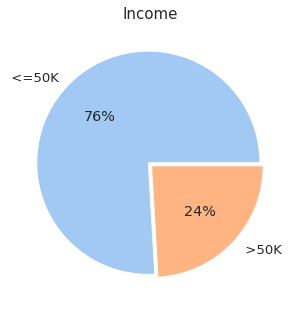

In [15]:
sns.set(rc={'figure.figsize': [5, 7]}, font_scale=1.2)
plt.title('Income', fontsize=15)
explode = [0.02] * 2
data = list(adult_df['income'].value_counts().values)
labels = list(adult_df['income'].value_counts().index)
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=explode);

- Imbalancing data
- Only 24% of data their incomes are greater than 50K 

> ### Workclass:
>> #### What are the frequencies of all workclass?
>> #### Is there a relation between workclass and income?

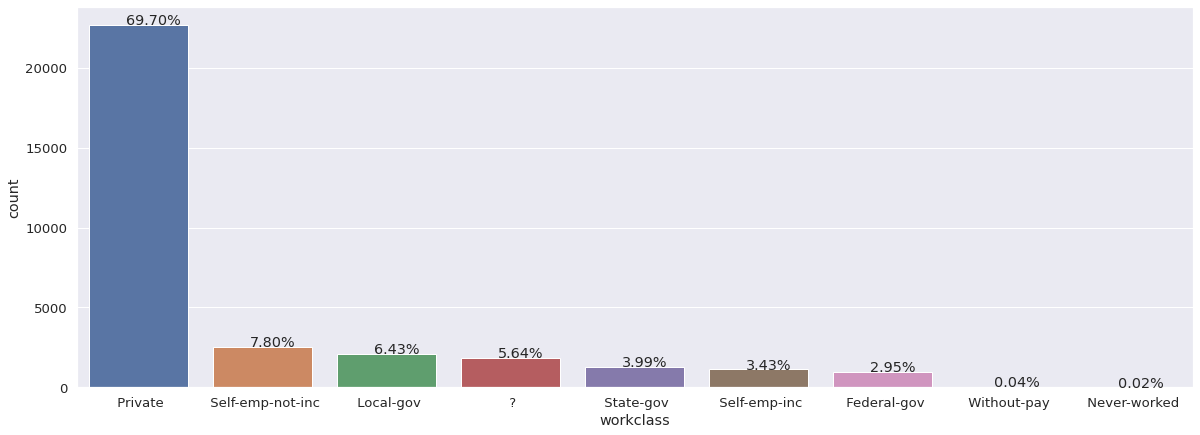

In [16]:
sns.set(rc={'figure.figsize': [20, 7]}, font_scale=1.2)
ax=sns.countplot(data=adult_df, x='workclass', order=adult_df['workclass'].value_counts().index)
display_countplot_percent(adult_df, ax)

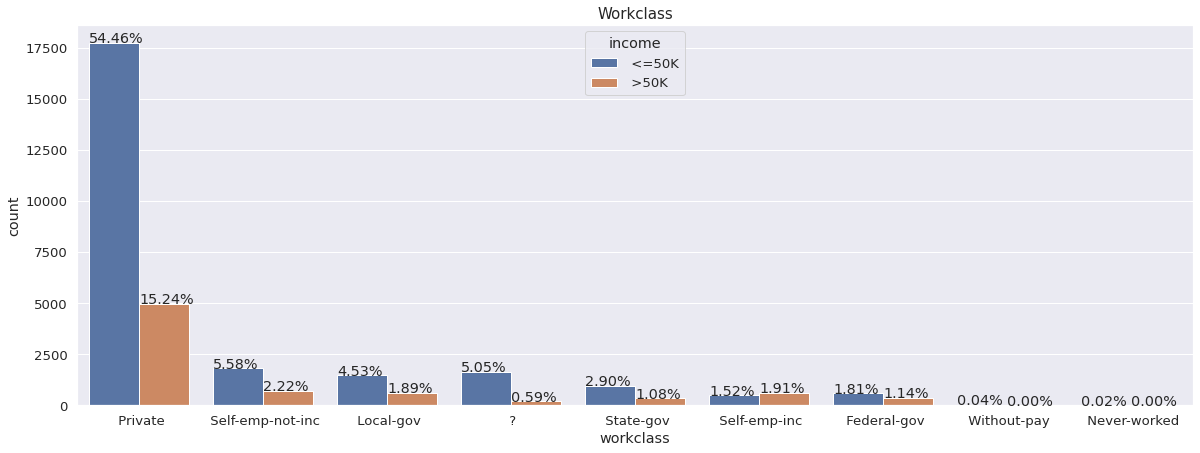

In [17]:
sns.set(rc={'figure.figsize': [20, 7]}, font_scale=1.2)
plt.title('Workclass', fontsize=15)
ax=sns.countplot(x='workclass', data=adult_df, hue='income', order=adult_df['workclass'].value_counts().index)
display_countplot_percent(adult_df, ax, True)

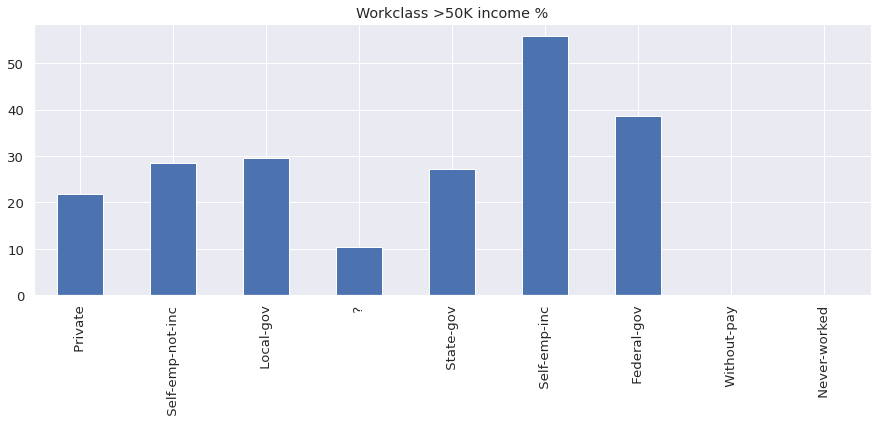

In [18]:
df_income_prop = target_class_proportion(adult_df, 'workclass')
df_income_prop.loc['Value >50 income %'].plot(kind='bar', figsize=(15,5), title="Workclass >50K income %");

In [19]:
df_income_prop

,Private,Self-emp-not-inc,Local-gov,?,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
Total %,69.703,7.804,6.428,5.639,3.986,3.427,2.948,0.043,0.021
Total >50 income %,15.242,2.224,1.895,0.587,1.084,1.910,1.139,0.000,0.000
>50 income %,63.295,9.234,7.869,2.436,4.502,7.933,4.732,0.000,0.000
Value >50 income %,21.867,28.493,29.479,10.403,27.196,55.735,38.646,0.000,0.000


- Majority around 70% are "Private" workclass
- 5.6% are missing values contains '?'
- Private workclass has the highest ">50K" income percentage 15% of total data and 22% of them their income ">50K"
- Although Self Employment Incorporated represent only 3.4% but has the highest ">50K" income ratio 55%
- 38% of Fedral Government workclass have ">50K" income
- For the other workclasses "Self-emp-not-inc", "Local-gov" and "State-gov" have almost same ">50K" income ratio 28.5%, 29.5%, 27.2%
- For the missing values part '?' has only 10% ">50K" income ratio
- For "Without-pay", "Never-worked" donot have any record with income ">50K"

In [20]:
adult_df[adult_df['workclass']==' Never-worked']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,Full-time,0
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K,Full-time,0
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K,Part-time,0
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K,Part-time,0
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K,Full-time,0
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K,Full-time,0
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K,Part-time,0


** - How they are "Never Worked" and have "hours-per-week" and income?
- All "Never Worked" have missing values in "Occupation" and their education levels below bachelor's degree
- Their ages below 30 and most of them below 24
- Most of them "Never-married" and "Own-child"

In [21]:
adult_df[adult_df['workclass']==' Without-pay']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain
1901,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K,Over-time,0
9257,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K,Part-time,0
15533,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K,Full-time,0
15695,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K,Full-time,4416
16812,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K,Part-time,0
20073,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K,Part-time,2414
21944,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K,Part-time,0
22215,19,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K,Part-time,0
24596,62,Without-pay,170114,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Over-time,0
25500,29,Without-pay,212588,Some-college,10,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0,0,65,United-States,<=50K,Over-time,0


- All "Without-pay" their education levels below bachelor's degree as "Never-worked"
- Their ages below 30 or above 45, half of them are above 60 
- Half of them working as part time, less than 32 hours per week

In [22]:
adult_df[(adult_df['workclass']==' ?')]['occupation'].value_counts()

 ?    1836
Name: occupation, dtype: int64

- All missing values "?" in "Workclass" missing also in "Occupation"

In [23]:
adult_df[(adult_df['workclass']==' ?') & (adult_df['income'] == ' >50K')]['education'].value_counts()

 HS-grad         46
 Bachelors       45
 Some-college    35
 Masters         18
 Assoc-voc       13
 Doctorate       11
 Prof-school      8
 Assoc-acdm       6
 5th-6th          2
 7th-8th          2
 12th             2
 10th             2
 9th              1
Name: education, dtype: int64

- Missing Workclass with income ">50K" have different education levels

> ### Occupation
>> #### What are the frequencies of occupations?
>> #### Does occupations affect income class?

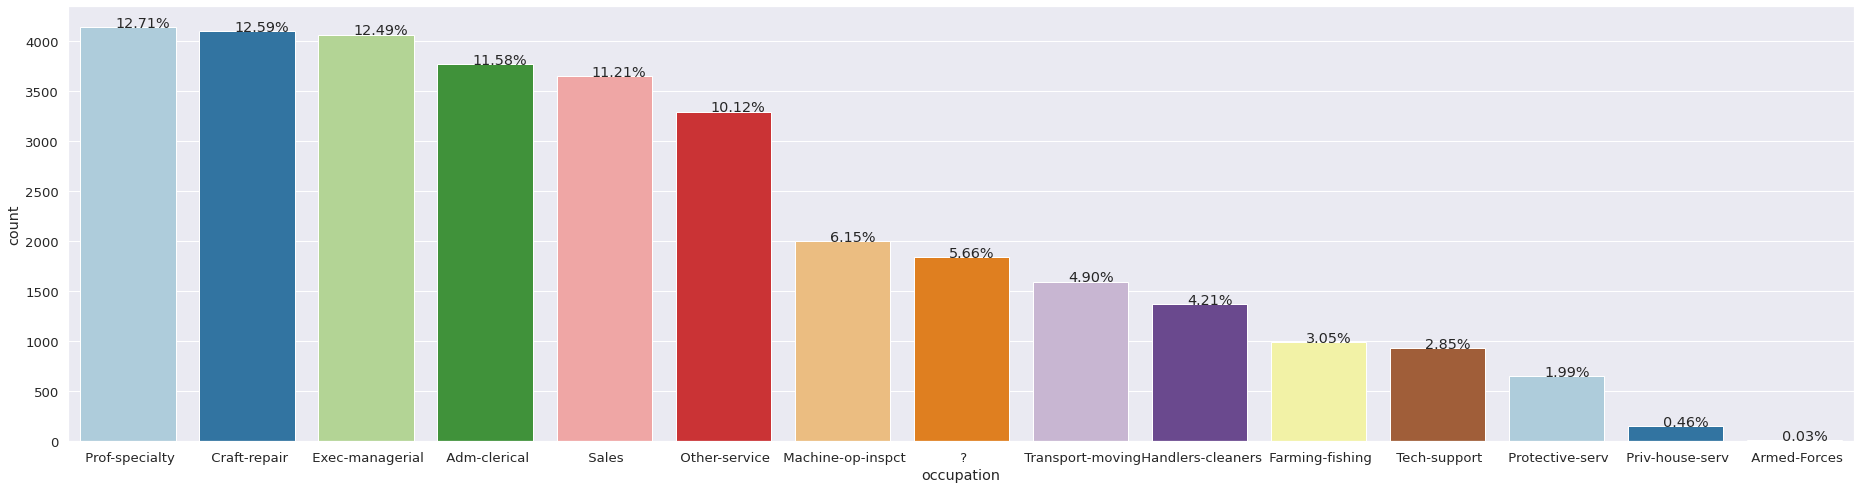

In [24]:
sns.set(rc={'figure.figsize': [32, 8]}, font_scale=1.2)
ax=sns.countplot(data=adult_df, x='occupation', palette='Paired', order=adult_df['occupation'].value_counts().index)
display_countplot_percent(adult_df, ax)

- Highest percenatges around (12.5%):
> "Prof-speciality", "Craft-repair" and "Exec-managerial"
- Second around (11%):
> "Admin-clerical", "Sales" and "Other-services"
- Third around(6%-4%):
> "Machine-op-inspct", "?", "Transport-moving" and "Handlers-cleaners"
- Fourth around (3%-2%):
> "Farming-fishing", "Tech-support" and "Prodective-serv"
- Fifth & lowest, less than 1%:
> "Priv-house-serv" and "Armed-Forces"
- 5.6% are missing values '?', also workclass has same percenatge of missing values "?"

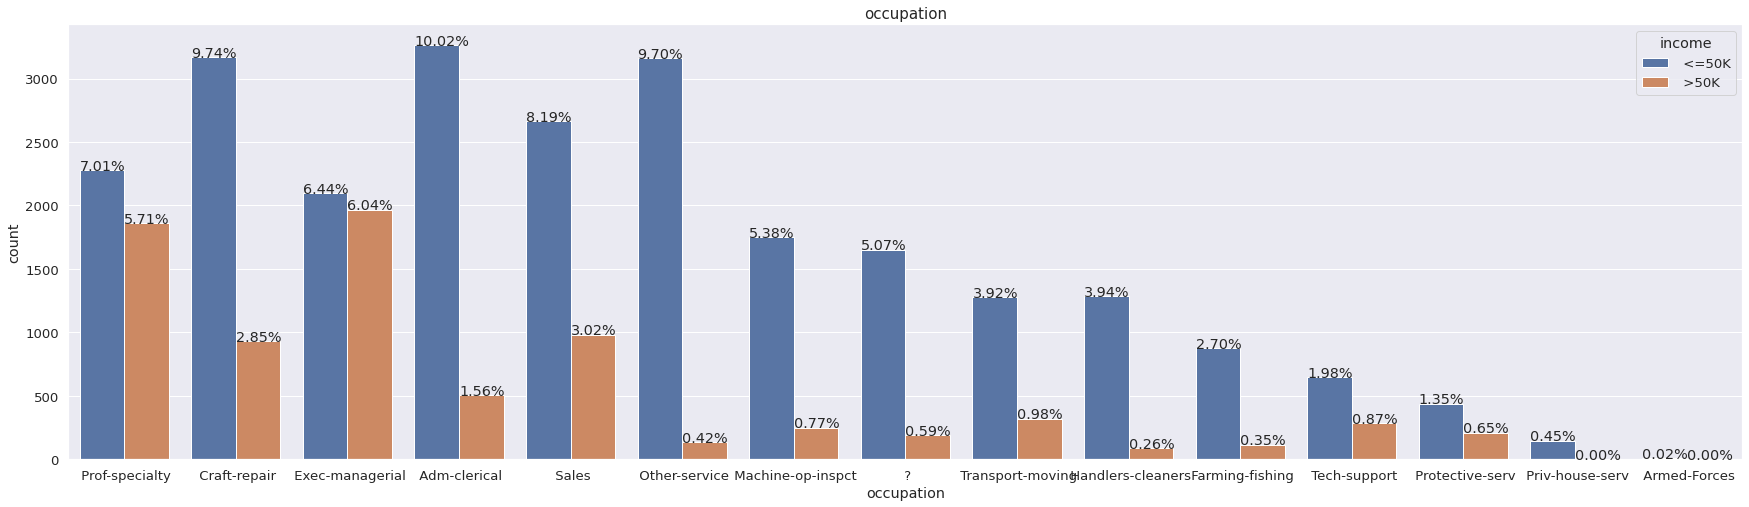

In [25]:
sns.set(rc={'figure.figsize': [30, 8]}, font_scale=1.2)
plt.title('occupation', fontsize=15)
ax=sns.countplot(x='occupation', data=adult_df, hue='income', order=adult_df['occupation'].value_counts().index)
display_countplot_percent(adult_df, ax, True)

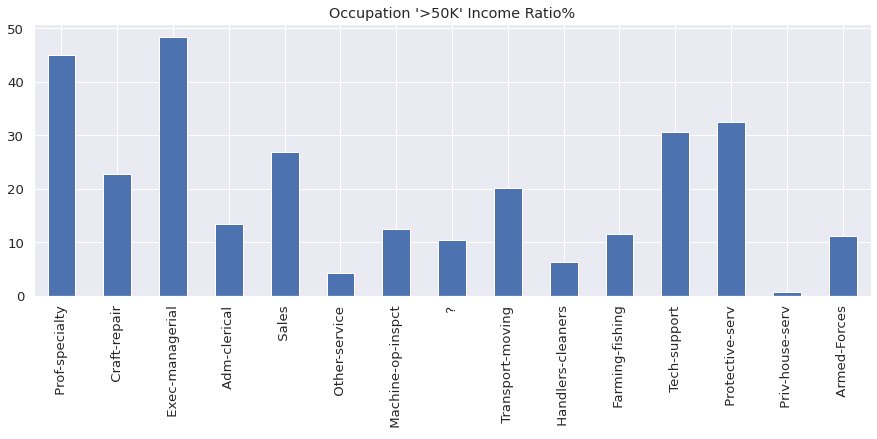

In [26]:
df_income_prop = target_class_proportion(adult_df, 'occupation')
df_income_prop.loc['Value >50 income %'].plot(kind='bar', figsize=(15,5), title="Occupation '>50K' Income Ratio%");

In [27]:
adult_df[(adult_df['occupation'] == ' Armed-Forces') & (adult_df['income'] == ' >50K')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain
25799,46,Federal-gov,344415,Masters,14,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,1887,40,United-States,>50K,Full-time,-1887


In [28]:
adult_df[(adult_df['occupation'] == ' Armed-Forces')]['education'].value_counts()

 HS-grad         4
 Some-college    2
 Bachelors       1
 12th            1
 Masters         1
Name: education, dtype: int64

In [29]:
adult_df[(adult_df['occupation'] == ' Priv-house-serv') & (adult_df['income'] == ' >50K')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain
28172,47,Private,97883,Bachelors,13,Widowed,Priv-house-serv,Unmarried,White,Female,25236,0,35,United-States,>50K,Full-time,25236


In [30]:
adult_df[(adult_df['occupation'] == ' Priv-house-serv')]['education'].value_counts()

 HS-grad         50
 Some-college    16
 5th-6th         14
 11th            14
 1st-4th         11
 9th             10
 7th-8th          8
 Bachelors        7
 10th             6
 12th             4
 Assoc-voc        4
 Assoc-acdm       2
 Preschool        2
 Masters          1
Name: education, dtype: int64

In [31]:
df_income_prop

,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,?,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
Total %,12.715,12.589,12.487,11.578,11.210,10.119,6.148,5.660,4.905,4.207,3.053,2.850,1.993,0.458,0.028
Total >50 income %,5.709,2.853,6.044,1.557,3.019,0.421,0.768,0.587,0.983,0.264,0.353,0.869,0.648,0.003,0.003
>50 income %,23.709,11.848,25.099,6.466,12.537,1.747,3.188,2.436,4.081,1.097,1.467,3.609,2.691,0.013,0.013
Value >50 income %,44.903,22.664,48.401,13.448,26.932,4.158,12.488,10.364,20.038,6.277,11.569,30.496,32.512,0.671,11.111


- Exec-managerial has the highest ">50K" income ratio 48%, also they represent 12.5% as one of top three highest frequency and the highest ">50K" percentage 6% 
- "Prof-specialty" has 45% ">50K" income ratio, represent the second highest ">50K" income percenatge 5.7%
- "Priv-house-serv" and "Armed-Forces" have only one record with income ">50K" 
-- For the "Armed Forces" the only one has master degree
- Lowest ">50K" Income Ratio:
> "Other-service", "?", "Handlers-clearners", "Farming-fishing", "Machine-op-inspct"
- Highest ">50K" Income Ratio:
> "Exec-managerial" 48%<br>
> "Prof-specialty" 45%<br>
> "Prodective-serv" 32%<br>
> "Tech-support" 28%

> ### Education
>> #### What are the frequencies of education levels?
>> #### Does ecducation level affect income class?

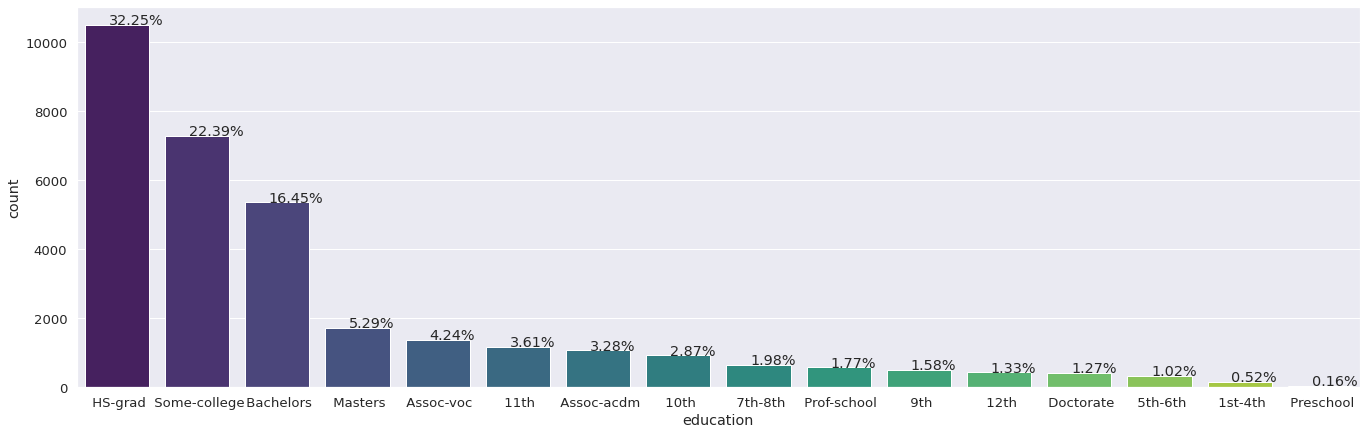

In [32]:
sns.set(rc={'figure.figsize': [23, 7]}, font_scale=1.2)
ax=sns.countplot(data=adult_df, x='education', palette='viridis', order=adult_df['education'].value_counts().index)
display_countplot_percent(adult_df, ax)

- The majority of education level 32% has high school education level
- "HS-grad, Some-college and Bachelors" have the highest percentages all around 70% of total records
- "Preschool, 1st-4th and 5th-6th" all have the lowest percentages, they all less than 2%
- "10th, 7th-8th, Prof-school, 9th, 12th and Doctorate" all below 2%

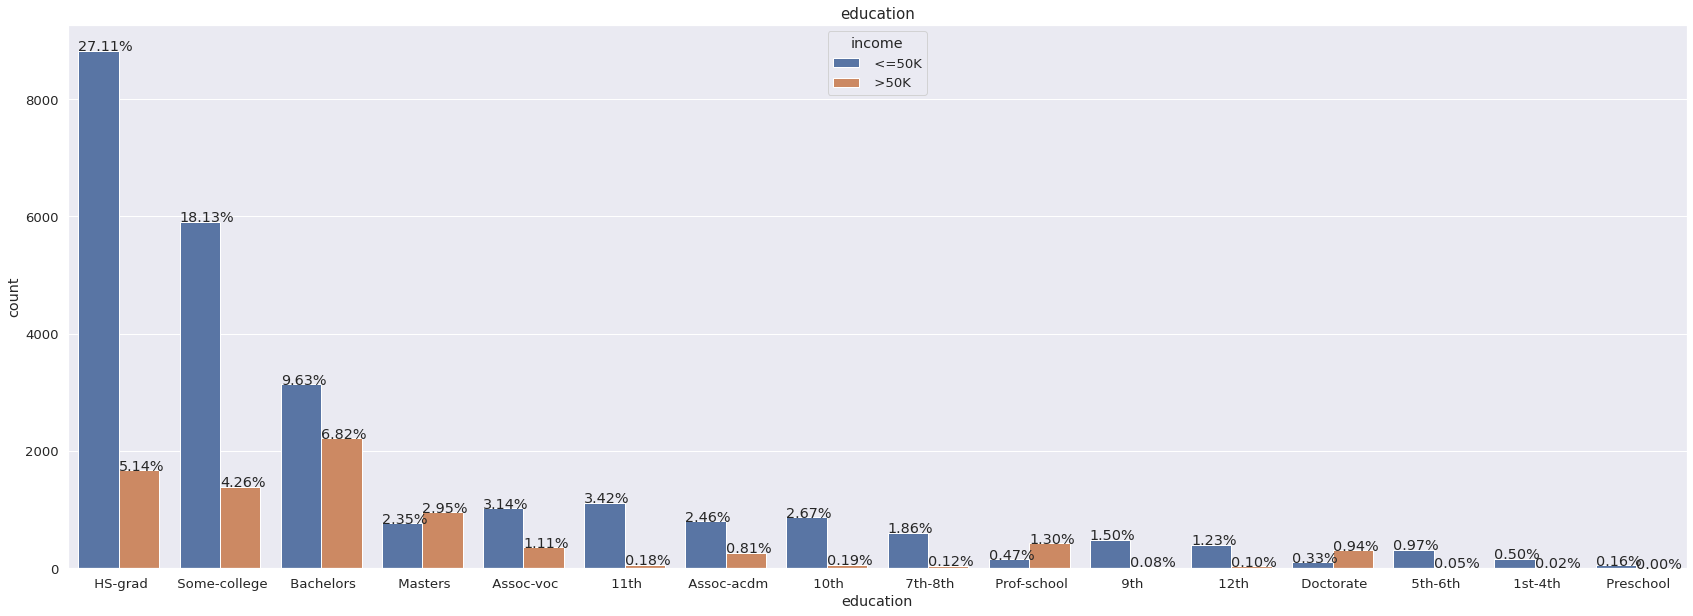

In [33]:
sns.set(rc={'figure.figsize': [29, 10]}, font_scale=1.2)
plt.title('education', fontsize=15)
ax=sns.countplot(x='education', data=adult_df, hue='income', order=adult_df['education'].value_counts().index)
display_countplot_percent(adult_df, ax, True)

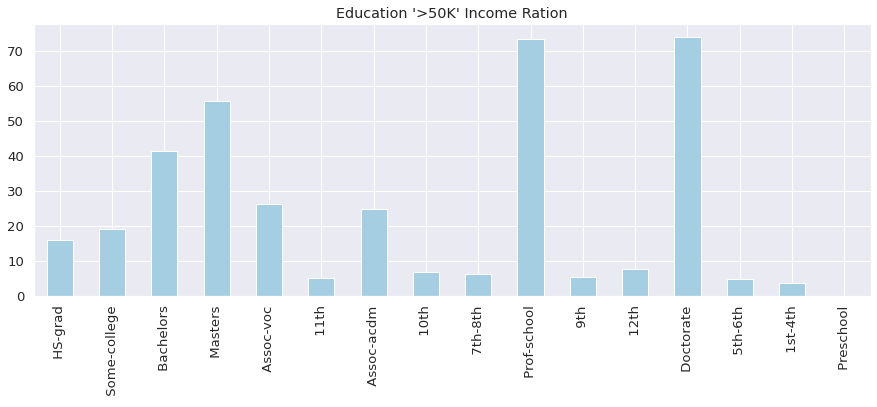

In [34]:
df_income_prop = target_class_proportion(adult_df, 'education')
df_income_prop.loc['Value >50 income %'].plot(kind='bar', figsize=(15,5), title="Education '>50K' Income Ration", colormap='Paired');

In [35]:
df_income_prop

,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
Total %,32.250,22.392,16.446,5.292,4.244,3.609,3.277,2.865,1.984,1.769,1.579,1.330,1.268,1.023,0.516,0.157
Total >50 income %,5.144,4.260,6.821,2.945,1.109,0.184,0.814,0.190,0.123,1.299,0.083,0.101,0.940,0.049,0.018,0.000
>50 income %,21.362,17.689,28.325,12.231,4.604,0.765,3.380,0.791,0.510,5.395,0.344,0.421,3.903,0.204,0.077,0.000
Value >50 income %,15.951,19.023,41.475,55.659,26.122,5.106,24.836,6.645,6.192,73.438,5.253,7.621,74.092,4.805,3.571,0.000


- As in the above dataframe:
> "Doctorate and Prof-school" both have the highest ">50K" income ratio with 74%<br>
> Then "Masters" and "Bachelors" 55%, 41%  
- But "Bachelors" has the highest ">50K" income percenatge 6.82%
- Logically by increasing education level the ration of income ">50K" increased 

> ### Educational-num
>> #### What is the distribution of educational numbers?
>> #### Does educational number same as education attribute?
>> #### Does ecducational number affect income class?

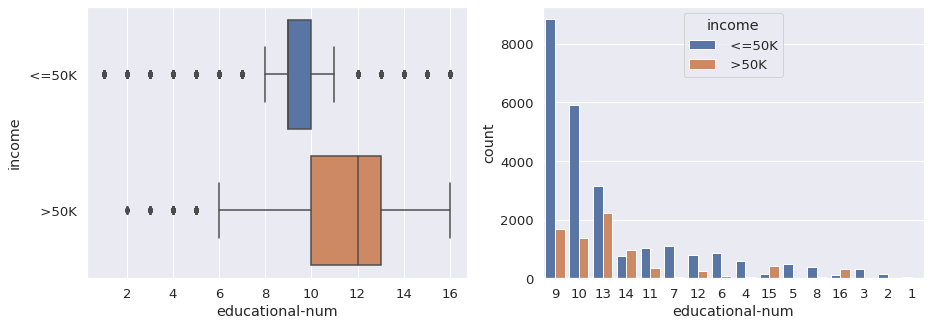

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["educational-num"], y=adult_df['income'], ax=axes[0])
sns.countplot(data=adult_df, x="educational-num", hue='income', order=adult_df['educational-num'].value_counts().index, ax=axes[1]);

In [37]:
adult_df[adult_df['income'] == ' <=50K'].describe()["educational-num"]

count   24720.000
mean        9.595
std         2.436
min         1.000
25%         9.000
50%         9.000
75%        10.000
max        16.000
Name: educational-num, dtype: float64

In [38]:
adult_df[adult_df['income'] == ' >50K'].describe()["educational-num"]

count   7841.000
mean      11.612
std        2.385
min        2.000
25%       10.000
50%       12.000
75%       13.000
max       16.000
Name: educational-num, dtype: float64

- Educational number is the ordinal mapping of education levels
- 75% of income "<=50K" till 10 educational number, on the other hand till 13 in income ">50K" 
- Increasing in educational number affect on income class 

In [39]:
# === Income >50K educational number outliers ===
out_50_income_df = adult_df[(adult_df['income'] == ' >50K') & (adult_df['educational-num'] <= 6)]
pd.crosstab(out_50_income_df['income'],out_50_income_df['educational-num'])

educational-num,2,3,4,5,6
income,,,,,
>50K,6,16,40,27,62


In [40]:
out_50_income_df['workclass'].value_counts()[:5]

 Private             95
 Self-emp-not-inc    30
 Self-emp-inc        10
 ?                    7
 Local-gov            6
Name: workclass, dtype: int64

In [41]:
out_50_income_df['occupation'].value_counts()[:5]

 Craft-repair         39
 Transport-moving     29
 Machine-op-inspct    19
 Exec-managerial      17
 Sales                15
Name: occupation, dtype: int64

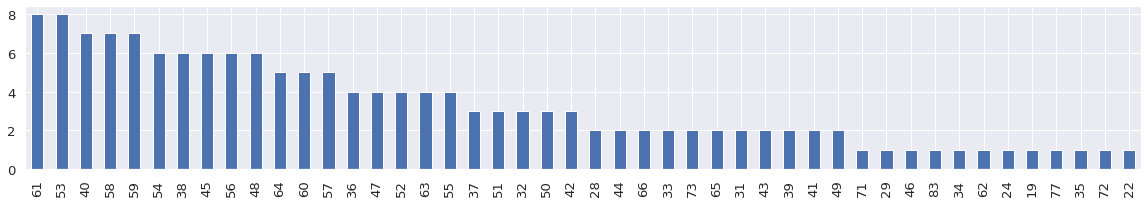

In [42]:
out_50_income_df['age'].value_counts().plot(kind='bar', figsize=(20,3));

- Most of outliers with income ">50K" and eduactional number >= "6" which equal to "10th" and below are 
"Craft-repair" or "Transport-moving" or "Machine-op-inspct" and are older 

In [43]:
# === Income <=50K educational number outliers ===
out_less_50_income_df = adult_df[(adult_df['income'] == ' <=50K') & (adult_df['educational-num'] > 11)]
pd.crosstab(out_less_50_income_df['income'],out_less_50_income_df['educational-num'])

educational-num,12,13,14,15,16
income,,,,,
<=50K,802,3134,764,153,107


In [44]:
out_less_50_income_df['occupation'].value_counts()[:10]

 Prof-specialty       1634
 Exec-managerial       817
 Adm-clerical          603
 Sales                 596
 Other-service         245
 Craft-repair          236
 Tech-support          228
 ?                     213
 Machine-op-inspct      83
 Transport-moving       78
Name: occupation, dtype: int64

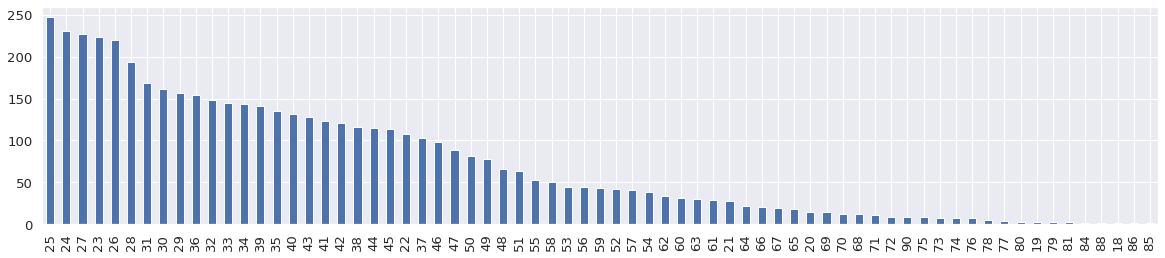

In [45]:
out_less_50_income_df['age'].value_counts().plot(kind='bar', figsize=(20,4));

- May be those who gain <=50K income and have education number above 11 mapping to "Bachelor" still fresh grade or juniors as the majority their ages in twenties
- Most of them have "Prof-specialty" Occupation
>
- ##### For higher education levels even in higher occupations with <=50K income most probably youth, on the other hand the lower education level with >50K income most probable are older which reflect their work experiences

> ### Gender
>> #### Which gender has the highest frequency?
>> #### Does gender affect income class?

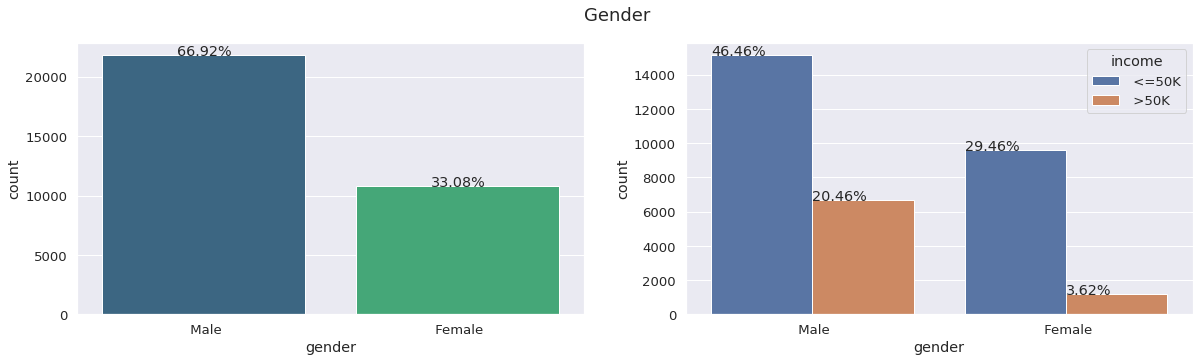

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle('Gender', fontsize=18) 
ax_0=sns.countplot(ax=axes[0], data=adult_df, x='gender', order=adult_df['gender'].value_counts().index, palette='viridis')
display_countplot_percent(adult_df, ax_0)
ax_1=sns.countplot(ax=axes[1], data=adult_df, x='gender', order=adult_df['gender'].value_counts().index, hue='income')
display_countplot_percent(adult_df, ax_1, True)

In [47]:
target_class_proportion(adult_df, 'gender')

,Male,Female
Total %,66.921,33.079
Total >50 income %,20.460,3.621
>50 income %,84.964,15.036
Value >50 income %,30.574,10.946


- 67% are males and 30.5% of males have income ">50K" also has the highest ">50K" income ratio 
- 33% are females and around 11% have income ">50K"
- Males have the highest frequency and ">50K" income ratio

> ### Marital-Status
>> #### What are the frequencies of marital status?
>> #### There is a relation between marital status and income class?

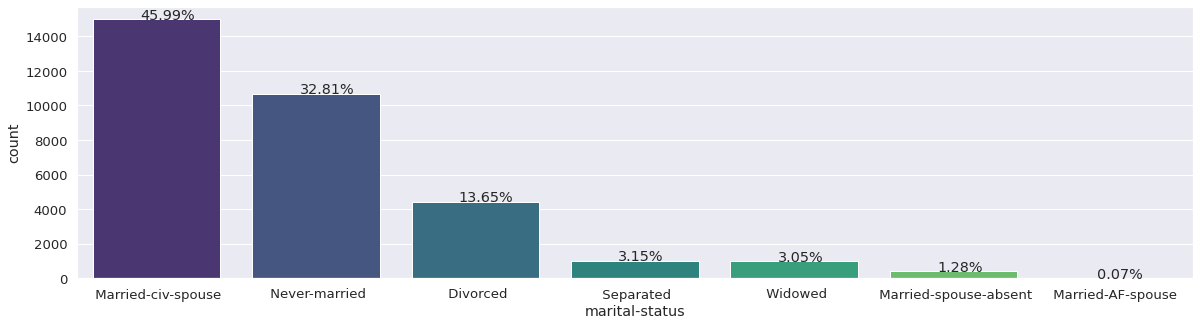

In [48]:
sns.set(rc={'figure.figsize': [20, 5]}, font_scale=1.2)
ax=sns.countplot(data=adult_df, x='marital-status', palette='viridis', order=adult_df['marital-status'].value_counts().index)
display_countplot_percent(adult_df, ax)

- The majority are married civil spouse 46% and never married 33%
- Married armed force spouse and absent spouse are the lowest percentages

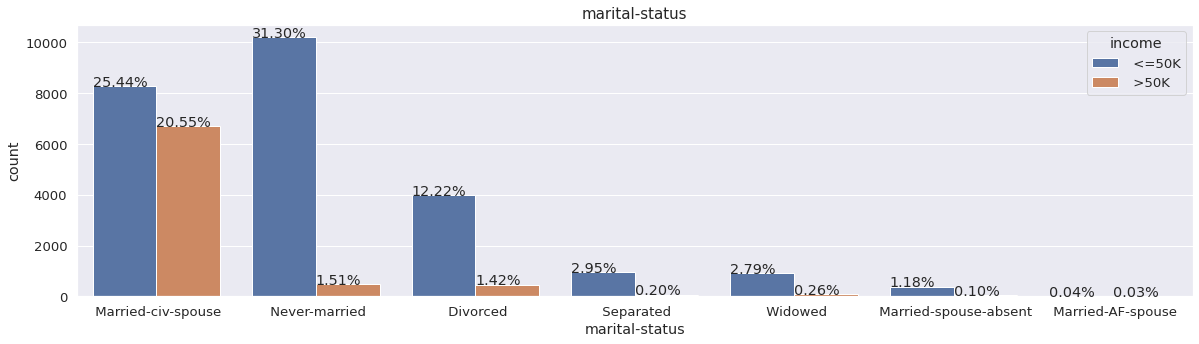

In [49]:
sns.set(rc={'figure.figsize': [20, 5]}, font_scale=1.2)
plt.title('marital-status', fontsize=15)
ax=sns.countplot(x='marital-status', data=adult_df, hue='income', order=adult_df['marital-status'].value_counts().index)
display_countplot_percent(adult_df, ax, True)

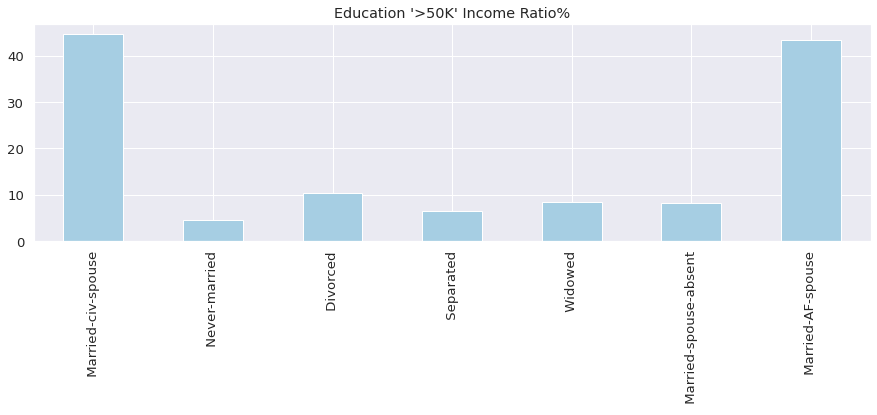

In [50]:
df_income_prop = target_class_proportion(adult_df, 'marital-status')
df_income_prop.loc['Value >50 income %'].plot(kind='bar', figsize=(15,4), title="Education '>50K' Income Ratio%", colormap='Paired');

In [51]:
df_income_prop

,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
Total %,45.994,32.809,13.645,3.148,3.050,1.284,0.071
Total >50 income %,20.552,1.508,1.422,0.203,0.261,0.104,0.031
>50 income %,85.346,6.262,5.905,0.842,1.084,0.434,0.128
Value >50 income %,44.685,4.596,10.421,6.439,8.560,8.134,43.478


- Married civil spouse has the highest ">50K" income percentage 20.5%, also the highest ">50k" income ratio 45% 
- Never married and divorced have the 2nd highest ">50k" percenatge, but divorced has higher ">50K" income ratio 10% and never married around 5%
- Although "Never Married" has the second highest frequency but the ">50K" income ratio is the lowest
- Both married with civil of AF spouse have the almost same ">50K" income ratio, although civil spouse has the higheest frequencies
- Both Widowed & Married-spouse-absent have almost same ">50K" income ratio
- Marital status related to existed spouse even civil or AF have the highest ">50K" income ratio
- Widowed and Married-spouse-absent have almost same ">50K" income ratio
>
- We can merge "Widowed and Married-spouse-absent", "Married-AF-spouse and Married-civ-spouse", "Divorced and Separated"

> ### Relationship
>> #### What are the frequencies of relationship?
>> #### Does relationships affect income class?

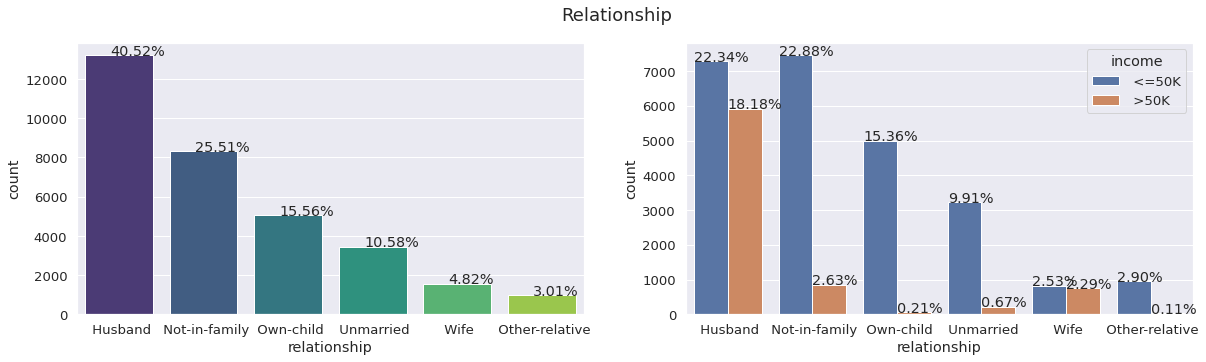

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle('Relationship', fontsize=18) 
ax_0=sns.countplot(ax=axes[0], data=adult_df, x='relationship', order=adult_df['relationship'].value_counts().index, palette='viridis')
display_countplot_percent(adult_df, ax_0)
ax_1=sns.countplot(ax=axes[1], data=adult_df, x='relationship', order=adult_df['relationship'].value_counts().index, hue='income')
display_countplot_percent(adult_df, ax_1, True)

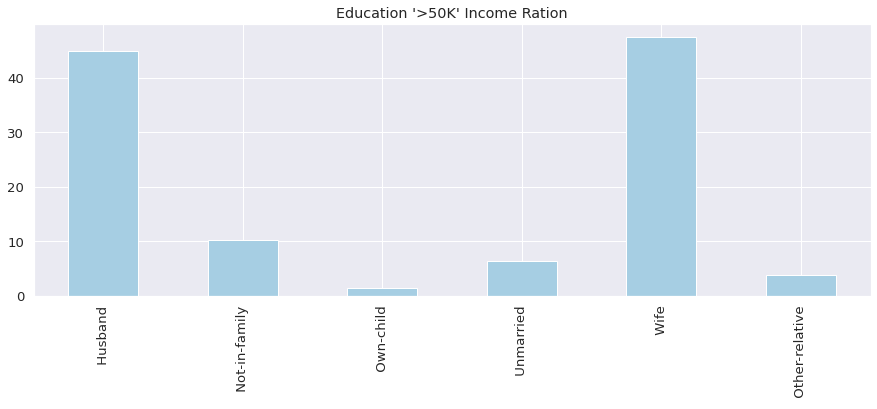

In [53]:
df_income_prop = target_class_proportion(adult_df, 'relationship')
df_income_prop.loc['Value >50 income %'].plot(kind='bar', figsize=(15,5), title="Education '>50K' Income Ration", colormap='Paired');

In [54]:
df_income_prop

,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
Total %,40.518,25.506,15.565,10.583,4.816,3.013
Total >50 income %,18.175,2.629,0.206,0.670,2.288,0.114
>50 income %,75.475,10.917,0.854,2.780,9.501,0.472
Value >50 income %,44.857,10.307,1.322,6.326,47.513,3.772


- Wifes have the highest ">50K" ratio 47% and then husbands with 45% although husbands have the highest frequency 40.5%
- Not-in-family has the second highest frequency but only 10% ">50K" income ratio 
##### - General in both husband or wife marital status which related to have a partner have the highest ">50K" income ratio

> ### Race
>> #### Which races have the highest frequencies?
>> #### There is a relation between race and income class?

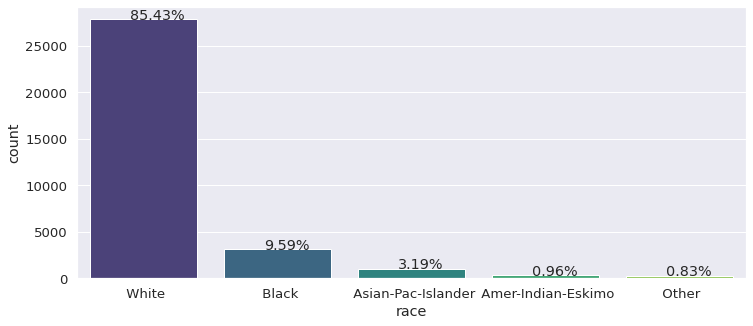

In [55]:
sns.set(rc={'figure.figsize': [12, 5]}, font_scale=1.2)
ax=sns.countplot(data=adult_df, x='race', palette='viridis', order=adult_df['race'].value_counts().index)
display_countplot_percent(adult_df, ax)

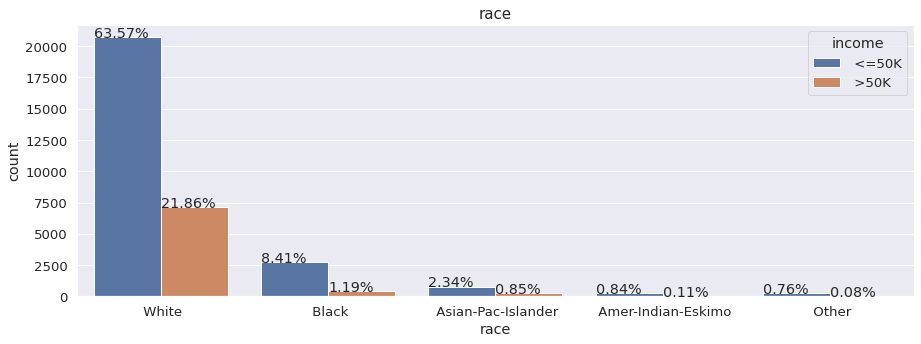

In [56]:
sns.set(rc={'figure.figsize': [15, 5]}, font_scale=1.2)
plt.title('race', fontsize=15)
ax=sns.countplot(x='race', data=adult_df, hue='income', order=adult_df['race'].value_counts().index)
display_countplot_percent(adult_df, ax, True)

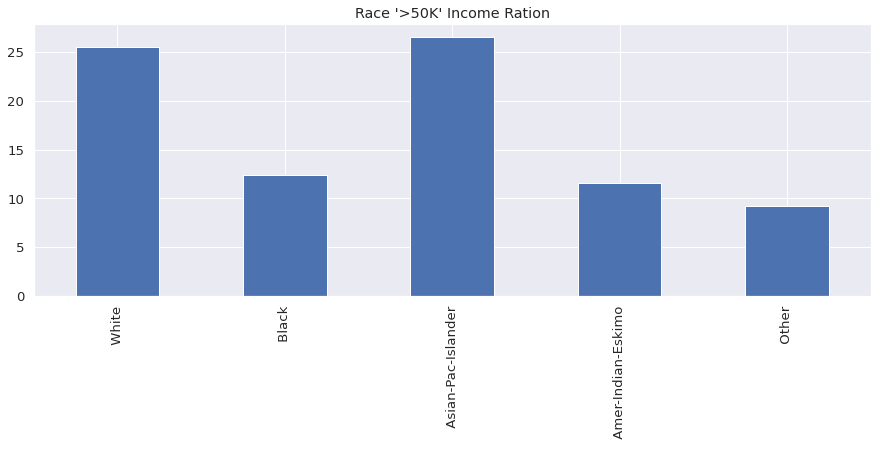

In [57]:
df_income_prop = target_class_proportion(adult_df, 'race')
df_income_prop.loc['Value >50 income %'].plot(kind="bar", title="Race '>50K' Income Ration");

In [58]:
df_income_prop

,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
Total %,85.427,9.594,3.191,0.955,0.832
Total >50 income %,21.857,1.189,0.848,0.111,0.077
>50 income %,90.766,4.936,3.520,0.459,0.319
Value >50 income %,25.586,12.388,26.564,11.576,9.225


- White race has the highest distribution with 85% and black race in the second position with only 9.5%
- Although white race has the highest requency but Asian-Pac-Islander race has the highest '>50K' income ratio 26.5%, also white race has 25.5%
- Although black race in the second top frequency but has only 12.3% '>50K' income ratio

> ### Native Country
>> #### Which native countries have the highest frequencies?
>> #### There is a relation between native country and income class?

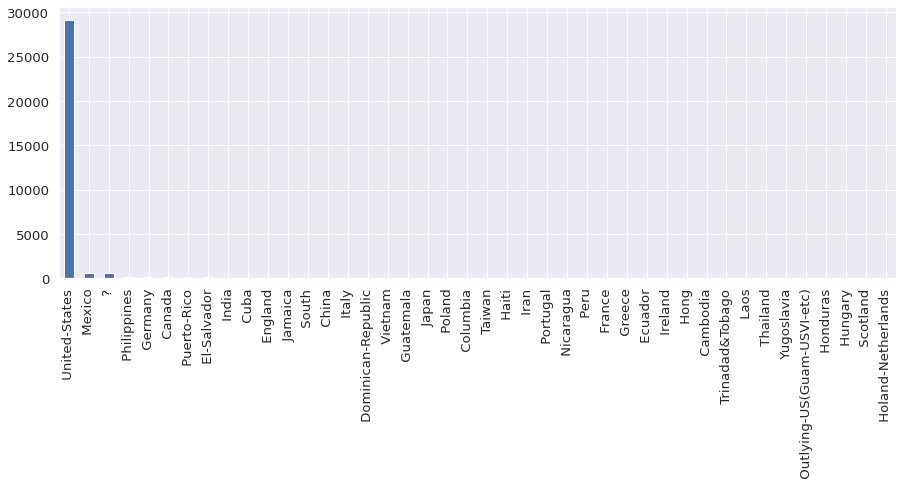

In [59]:
adult_df['native-country'].value_counts().plot.bar(figsize=(15,5));

In [60]:
adult_df['native-country'].value_counts(normalize=True)

 United-States                0.896
 Mexico                       0.020
 ?                            0.018
 Philippines                  0.006
 Germany                      0.004
 Canada                       0.004
 Puerto-Rico                  0.004
 El-Salvador                  0.003
 India                        0.003
 Cuba                         0.003
 England                      0.003
 Jamaica                      0.002
 South                        0.002
 China                        0.002
 Italy                        0.002
 Dominican-Republic           0.002
 Vietnam                      0.002
 Guatemala                    0.002
 Japan                        0.002
 Poland                       0.002
 Columbia                     0.002
 Taiwan                       0.002
 Haiti                        0.001
 Iran                         0.001
 Portugal                     0.001
 Nicaragua                    0.001
 Peru                         0.001
 France                     

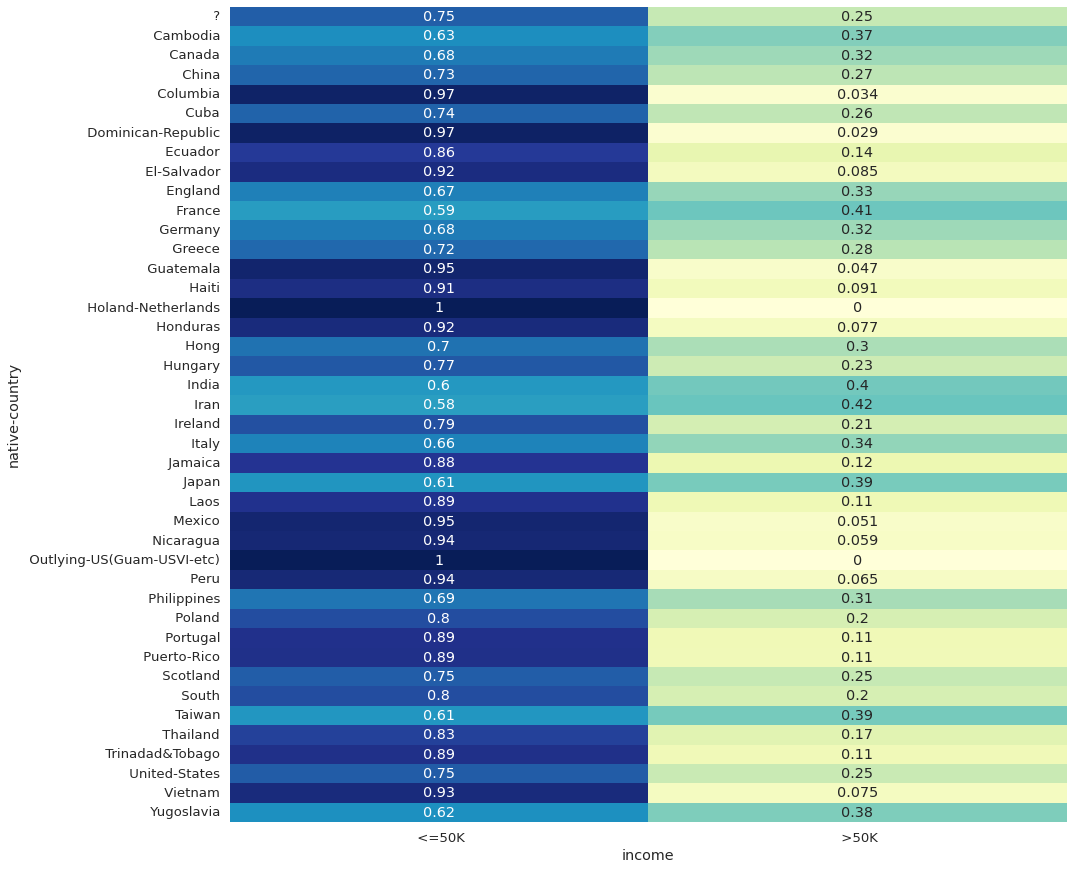

In [62]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.2)
native_country_income_prop=pd.crosstab(adult_df['native-country'],adult_df['income'],normalize='index')
sns.heatmap(native_country_income_prop, cmap="YlGnBu", annot=True, cbar=False);

- Missing values '?' 1.79%, 25% of them have income ">50K" aslo missing values have the second highest frequency
- Although United-States has the highest frequency 89% but only 25% of them have income ">50K"
- Mexico has the second top frequency with only 1.97% 
- The Highest ">50K" proportion:
> 42% Iran<br>
> 41% France<br>
> 40% India<br>
> 39% Japan & Taiwan<br>
> 38% Yugoslavia<br>
> 37% Cambodia<br>
> 34% Italy<br>
> 33% England<br>
> 32% Canada, Germany<br>
> 31% Philip<br>
> 30% Hong<br>
> 26% Cuba<br>
> 28% Greece<br>
> 25% Scotlanda<br>
> 25% "?"<br>
- Zero % ">50K" income:
> Outlying-US & Holand-Netherlands(Only one record)

> As 90% are from US, we can merge the other countries in 2 groups, one with countries which have the highest ">50K" income ratio which higher than the ">50K" income ratio of US 25%
and other group contained the others

> ### Work Type
>> #### Which work type has the highest frequencies?
>> #### There is a relation between work type and income class?

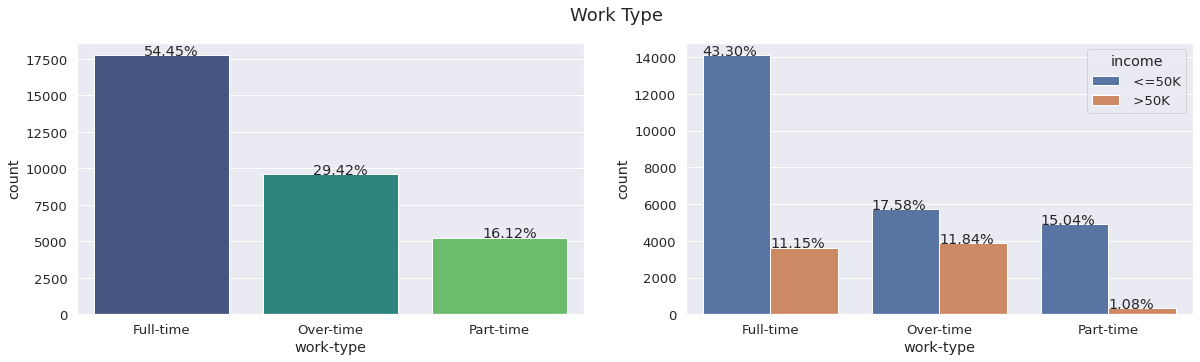

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle('Work Type', fontsize=18) 
ax_0=sns.countplot(ax=axes[0], data=adult_df, x='work-type', order=adult_df['work-type'].value_counts().index, palette='viridis')
display_countplot_percent(adult_df, ax_0)
ax_1=sns.countplot(ax=axes[1], data=adult_df, x='work-type', order=adult_df['work-type'].value_counts().index, hue='income')
display_countplot_percent(adult_df, ax_1, True)

In [64]:
target_class_proportion(adult_df, 'work-type')

,Full-time,Over-time,Part-time
Total %,54.452,29.425,16.124
Total >50 income %,11.154,11.842,1.084
>50 income %,46.321,49.177,4.502
Value >50 income %,20.485,40.246,6.724


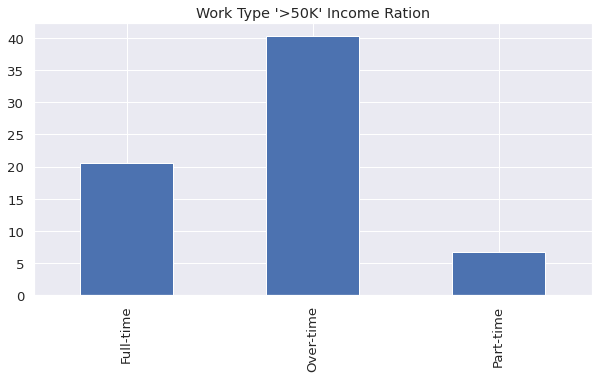

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
df_income_prop = target_class_proportion(adult_df, 'work-type')
df_income_prop.loc['Value >50 income %'].plot(kind="bar", title="Work Type '>50K' Income Ration");

In [66]:
adult_df[(adult_df['work-type'] == 'Part-time') & (adult_df['income'] == ' >50K')]['occupation'].value_counts()[:7]

 Prof-specialty     92
 ?                  59
 Exec-managerial    51
 Adm-clerical       39
 Sales              38
 Tech-support       24
 Other-service      17
Name: occupation, dtype: int64

In [67]:
adult_df[(adult_df['work-type'] == 'Part-time') & (adult_df['income'] == ' >50K')]['age'].value_counts()[:7]

67    14
39    13
61    12
58    11
51    11
40    11
66    10
Name: age, dtype: int64

- 54% have full-time job, 16% part time and 29% Overtime
- 40% of overtime have income ">50K", 20% of full-time and only 6.7% for part-time
>
- ##### Around 50% of records with income >50K working overtime

> ### Numeric attributes
>> #### Age, fnlwgt, Educational-num, Capital-gain, Capital-loss, Hours-per-week, capital-remain

> ### Age
>> #### What is the distribution of age?
>> #### Which range of ages have the most frequency?
>> #### Is age contain outliers?
>> #### Is there a relationship between ages and income?

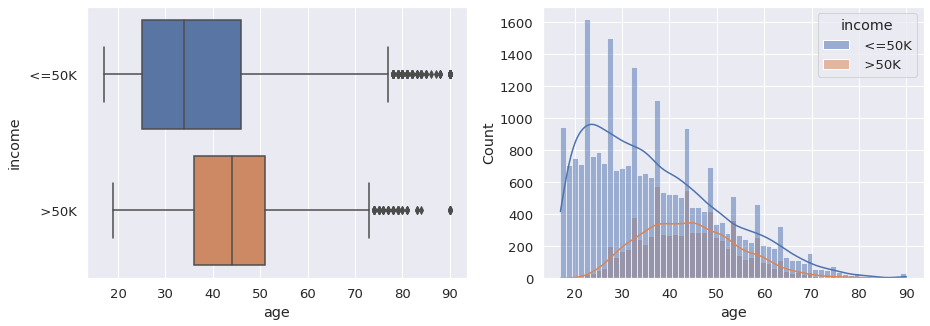

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["age"], y=adult_df['income'], ax=axes[0])
sns.histplot(data=adult_df, x="age", hue='income', kde=True, ax=axes[1]);

In [69]:
adult_df.describe()['age']

count   32561.000
mean       38.582
std        13.640
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

In [70]:
bins = [17,20,30,40,50,60,70,80,90]
box_bins = [17,28,37,48,90]

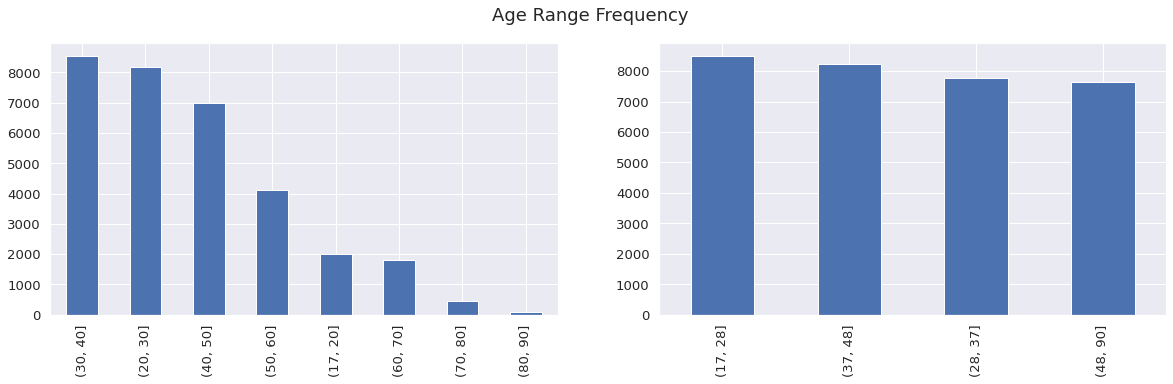

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle('Age Range Frequency', fontsize=18) 
adult_df['age-range'] = pd.cut(adult_df['age'], bins)
adult_df['age-box-range'] = pd.cut(adult_df['age'], box_bins)
adult_df['age-range'].value_counts().plot.bar(ax=axes[0])
adult_df['age-box-range'].value_counts().plot.bar(ax=axes[1]);

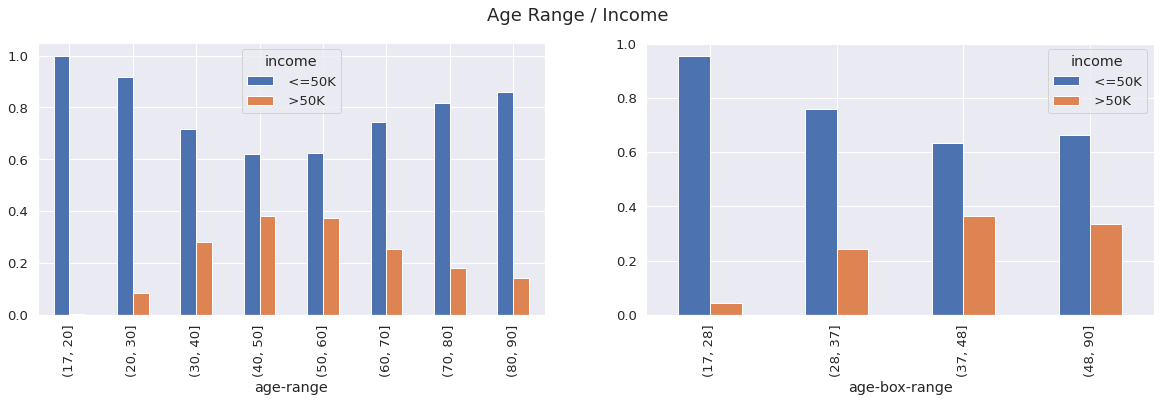

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle('Age Range / Income', fontsize=18) 

age_income = pd.crosstab(adult_df['age-range'], adult_df['income'])
age_income.div(age_income.sum(1).astype(float), axis=0).plot(kind="bar", ax=axes[0]);

age_box_income = pd.crosstab(adult_df['age-box-range'], adult_df['income'])
age_box_income.div(age_box_income.sum(1).astype(float), axis=0).plot(kind="bar", ax=axes[1]);

- Outliers mainly above 80
- 75% below 50 years
- Age range '30-40' has the highest frequency
- Strong right skewness for ages with income "<=50K"
- Normal ditribution for ages with income ">50K"
- "40-60" age range has the highest ">50k" income ratio  
- Age range below 20 has no income ">50K"

> ### fnlwgt
>> #### Is fnlwgt contain outliers?
>> #### Is there a relationship between fnlwgt and income?

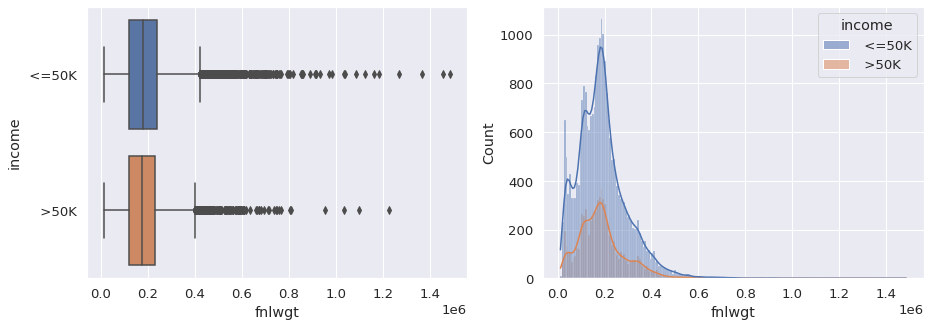

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["fnlwgt"], y=adult_df['income'], ax=axes[0])
sns.histplot(data=adult_df, x="fnlwgt", hue='income', kde=True, ax=axes[1]);

In [74]:
adult_df.describe()["fnlwgt"]

count     32561.000
mean     189778.367
std      105549.978
min       12285.000
25%      117827.000
50%      178356.000
75%      237051.000
max     1484705.000
Name: fnlwgt, dtype: float64

- Strong right skewness
- Final weights with income "<=50K" has more extreme outliers
- Has many outliers, both type of incomes are almost have the same distribution, so there is not effect on increasing and decreasing of final weight score
- No affect of final weight and income class and have many unique values

> ### Hours-per-week
>> #### Is hours-per-week contain outliers?
>> #### which number of hours have the highest frequency?
>> #### Is there a relationship between hours-per-week and income?

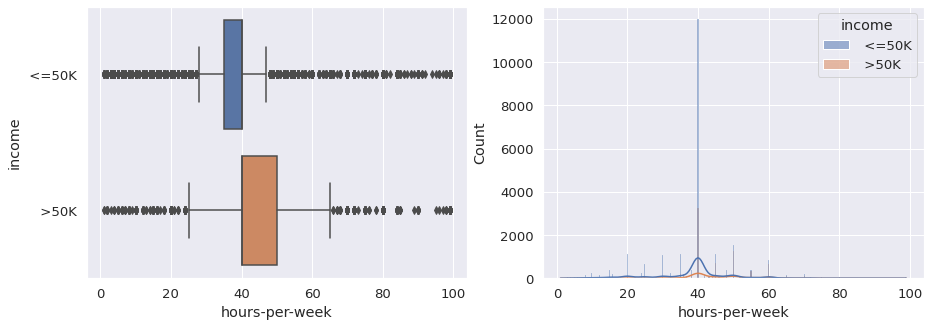

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["hours-per-week"], y=adult_df['income'], ax=axes[0])
sns.histplot(data=adult_df, x="hours-per-week", hue='income', kde=True, ax=axes[1]);

In [76]:
adult_df[adult_df['income'] == ' >50K'].describe()["hours-per-week"]

count   7841.000
mean      45.473
std       11.013
min        1.000
25%       40.000
50%       40.000
75%       50.000
max       99.000
Name: hours-per-week, dtype: float64

In [77]:
adult_df[adult_df['income'] == ' <=50K'].describe()["hours-per-week"]

count   24720.000
mean       38.840
std        12.319
min         1.000
25%        35.000
50%        40.000
75%        40.000
max        99.000
Name: hours-per-week, dtype: float64

In [78]:
adult_df[(adult_df['income'] == ' >50K') & (adult_df["hours-per-week"] <= 20)]['age'].value_counts()[:10]

67    10
61     9
39     9
58     7
51     7
30     7
70     6
47     6
41     6
35     6
Name: age, dtype: int64

In [79]:
adult_df[(adult_df['income'] == ' >50K') & (adult_df["hours-per-week"] <= 20)]['occupation'].value_counts()[:5]

 Prof-specialty     45
 ?                  42
 Exec-managerial    26
 Adm-clerical       24
 Sales              17
Name: occupation, dtype: int64

In [80]:
adult_df[adult_df["hours-per-week"] > 72]['occupation'].value_counts()[:5]

 Farming-fishing     73
 Prof-specialty      69
 Exec-managerial     56
 Transport-moving    48
 Other-service       42
Name: occupation, dtype: int64

- 40 working hours has the most frequency 
- 75% of income "<=50K" working below 41 hours, on the other hand 75% of income ">50K" working below 51 hours
- Increasing working hours affect on income class
- Records with income ">50K" working less than 20 hours per week, most of them are older than 30 and working as "Prof-specialty"
- Part of overtime working hours have extreme values till 99, if we consider one working full and part time jobs at the same time still has by maximum 72 working hours 40(Full) & 32(Part) also if he working 2 full time jobs which not allowed still work maximum 80 hours, most of them working in Farming-fishing & Prof-specialty

> ### Capital Gain
>> #### Is capital gain contain outliers?
>> #### Is there a relationship between capital gain and income?

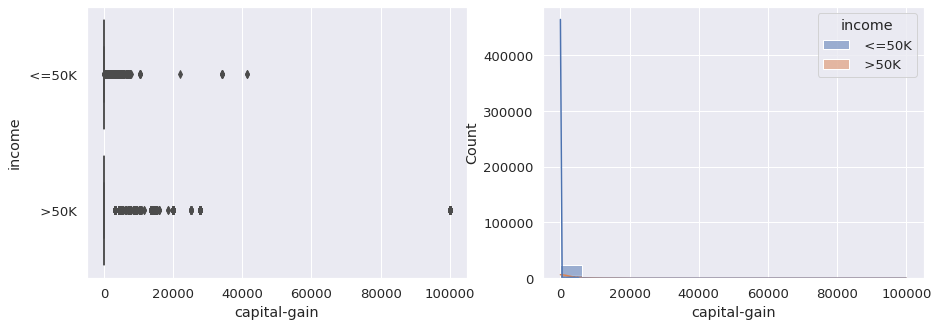

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["capital-gain"], y=adult_df['income'], ax=axes[0])
sns.histplot(data=adult_df, x="capital-gain", hue='income', kde=True, ax=axes[1]);

In [82]:
print("Zero capital gain%: ",len(adult_df[(adult_df['capital-gain'] <= 0)]) / len(adult_df) * 100)

Zero capital gain%:  91.67101747489328


In [83]:
adult_df[adult_df["capital-gain"] > 0]['income'].value_counts()

 >50K     1677
 <=50K    1035
Name: income, dtype: int64

In [84]:
adult_df.describe()["capital-gain"]

count   32561.000
mean     1077.649
std      7385.292
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital-gain, dtype: float64

In [85]:
adult_df[adult_df["capital-gain"] == 0]['income'].value_counts()

 <=50K    23685
 >50K      6164
Name: income, dtype: int64

In [86]:
adult_df[adult_df["capital-gain"] == 99999]['income'].value_counts()

 >50K    159
Name: income, dtype: int64

In [87]:
adult_df[(adult_df["capital-gain"] > 0) & (adult_df["capital-gain"] < 99999)]['income'].value_counts()

 >50K     1518
 <=50K    1035
Name: income, dtype: int64

In [88]:
adult_df[(adult_df["capital-gain"] > 0) & (adult_df["capital-gain"] < 99999) & (adult_df["income"] == ' >50K')]['capital-gain'].max()

27828

In [89]:
adult_df[(adult_df["capital-gain"] > 0) & (adult_df["capital-gain"] < 99999) & (adult_df["income"] == ' <=50K')]['capital-gain'].max()

41310

In [90]:
adult_df[(adult_df["capital-gain"] == 99999) & (adult_df["income"] == ' >50K')]['occupation'].value_counts()[:5]

 Prof-specialty     67
 Exec-managerial    42
 Sales              25
 Craft-repair        8
 Adm-clerical        6
Name: occupation, dtype: int64

In [91]:
adult_df[(adult_df["capital-gain"] == 41310) & (adult_df["income"] == ' <=50K')]['occupation'].value_counts()

 Farming-fishing    2
Name: occupation, dtype: int64

- 159 records their values equal to 99999 & all of them their incomes ">50K"
-- The majority working as "Prof-specialty", "Exec-managerial" and "Sales"
- Maximum value for capital gain for incomes ">50K" and below 99999 is "27828"
- Maximum value for capital gain for incomes "<=50K" and below 99999 is "41310", and working as "Farming-fishing"
- Maximum values below 99999 related to income "<=50K"

> ### Capital Loss
>> #### Is capital loss contain outliers?
>> #### Is there a relationship between capital loss and income?

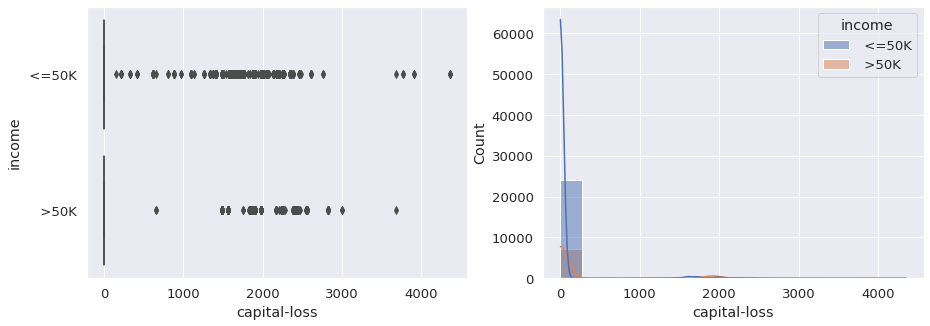

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["capital-loss"], y=adult_df['income'], ax=axes[0])
sns.histplot(data=adult_df, x="capital-loss", hue='income', kde=True, ax=axes[1]);

In [93]:
adult_df.describe()['capital-loss']

count   32561.000
mean       87.304
std       402.960
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital-loss, dtype: float64

In [94]:
adult_df[adult_df['capital-loss'] > 0]['income'].value_counts()

 >50K     773
 <=50K    746
Name: income, dtype: int64

In [95]:
adult_df[adult_df['capital-loss'] == 4356]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain,age-range,age-box-range
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Full-time,-4356,"(80, 90]","(48, 90]"
14756,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Part-time,-4356,"(80, 90]","(48, 90]"
30781,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,Full-time,-4356,"(60, 70]","(48, 90]"


- Capital loss existed more with income ">50K", on the opposite of capital gain 
- Capital loss maximum value "4356" related to "<=50K" & all are widowed, ages above 60 and below bachelor degree
- Capital loss for income ">50K" mainly between (1500 - 3000), on the other hand income "<=50K" has different ranges

> ### Capital Remain

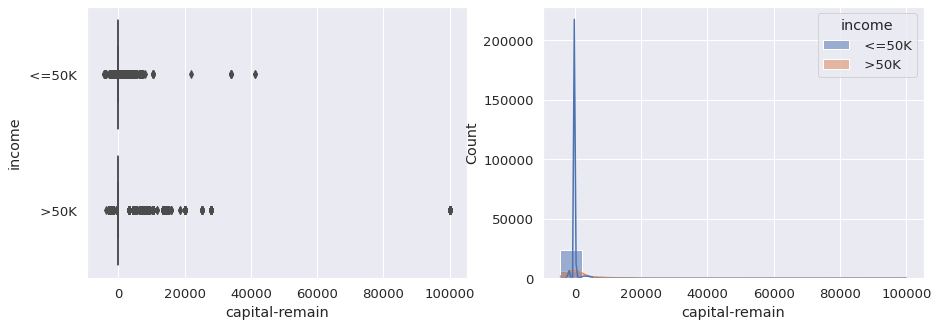

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(adult_df["capital-remain"], y=adult_df['income'], ax=axes[0])
sns.histplot(data=adult_df, x="capital-remain", hue='income', kde=True, ax=axes[1]);

In [97]:
adult_df.describe()["capital-remain"]

count   32561.000
mean      990.345
std      7408.987
min     -4356.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital-remain, dtype: float64

- We can check the effectiveness of this field after handling the outliers

> ### <a name="bi">Bivariate and Multivariate Anlaysis</a>

> ### Occupation & Workclass 

In [98]:
df = pd.crosstab(adult_df['workclass'],adult_df['occupation'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,,
?,1836,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Federal-gov,0,317,9,64,180,8,23,14,35,0,175,28,14,68,25
Local-gov,0,283,0,146,214,29,47,12,193,0,705,304,7,38,115
Never-worked,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Private,0,2833,0,3195,2691,455,1273,1913,2740,149,2313,190,2942,736,1266
Self-emp-inc,0,31,0,106,400,51,2,13,27,0,160,5,291,3,27
Self-emp-not-inc,0,50,0,531,392,430,15,36,175,0,373,6,385,26,122
State-gov,0,253,0,56,189,15,9,13,124,0,414,116,11,57,41
Without-pay,0,3,0,1,0,6,1,1,1,0,0,0,0,0,1


In [99]:
above_50_df = adult_df[(adult_df['income'] == ' >50K')]
df=pd.crosstab(above_50_df['workclass'],above_50_df['occupation'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,,
?,191,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Federal-gov,0,101,1,21,92,2,2,2,3,0,95,14,5,25,8
Local-gov,0,33,0,40,102,2,7,2,12,0,254,135,3,15,12
Private,0,321,0,721,1295,30,73,225,100,1,1008,30,684,221,254
Self-emp-inc,0,9,0,38,254,15,0,5,6,0,121,2,160,2,10
Self-emp-not-inc,0,16,0,95,144,64,3,11,12,0,210,1,128,11,29
State-gov,0,27,0,14,81,2,1,5,4,0,171,29,3,9,7


- All "Armed Forces" related to "Fedral-gov"
- All "?" missing values in both workclass & occupation and all "Never-worked" has missing values in occupation
- Most of "Protective-serv" working in government sectors and the majority in Local government
- Most of "Sales" work on private & self-employment
- Most of "Farming-fishing" working in both "Private" & "Self-emp-not-inc", and most them who have income ">50K" realted to "Self-emp-not-inc"
- Most of "Prof-specialty" working in "Private" sector
- Majority of "Tech-support","Handlers-cleaners", "Machine-op-inspct" and "Other-service" working in "Private" sector
>
- Most of "Without-pay" working in "Farming-fishing" 
>
- The highest occupation in "Federal-gov" is "Adm-clerical" 
- The highest occupation in both "Local-gov" and "State-gov" is "Prof-specialty"
- The highest occupation in "Self-emp-inc" is "Exec-managerial"

> ### Occupation & Education

In [100]:
df = pd.crosstab(adult_df['occupation'],adult_df['education'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
occupation,,,,,,,,,,,,,,,,
?,102,119,40,12,30,73,51,47,61,173,15,533,48,5,18,516
Adm-clerical,38,67,38,0,6,11,14,193,167,506,5,1365,68,2,9,1281
Armed-Forces,0,0,1,0,0,0,0,0,0,1,0,4,1,0,0,2
Craft-repair,170,175,58,23,43,116,96,115,252,226,2,1922,22,4,7,868
Exec-managerial,24,34,13,4,1,19,13,145,150,1369,55,807,501,0,52,879
Farming-fishing,44,37,16,18,36,70,28,14,52,77,1,404,10,9,4,174
Handlers-cleaners,71,123,38,16,40,46,49,24,28,50,0,611,5,2,0,267
Machine-op-inspct,101,99,35,23,56,93,76,33,63,69,1,1023,8,11,1,310
Other-service,194,238,85,40,64,98,101,78,115,181,1,1281,19,15,4,781


In [101]:
df=pd.crosstab(above_50_df['occupation'],above_50_df['education'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
occupation,,,,,,,,,,,,,,,
?,2,0,2,0,2,2,1,6,13,45,11,46,18,8,35
Adm-clerical,0,3,1,0,0,1,1,30,18,119,2,163,23,4,142
Armed-Forces,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Craft-repair,19,18,9,2,3,8,7,32,81,88,1,405,10,5,241
Exec-managerial,6,7,2,2,1,6,2,66,64,779,50,261,372,38,312
Farming-fishing,1,2,0,1,0,5,1,3,9,21,1,47,3,1,20
Handlers-cleaners,2,5,2,0,2,0,3,2,2,11,0,38,0,0,19
Machine-op-inspct,6,3,1,1,3,6,3,9,14,18,1,140,1,0,44
Other-service,1,6,1,0,0,1,2,6,9,29,1,53,1,1,26


- Most of "Doctorate" & "Prof-school" working as "Prof-specialty"
- Most of "Bachelors" & "Masters" working as "Prof-specialty" & "Exec-managerial"
- Most of "School" grad working in other services, Priv-house-serv, Handlers-cleaners, Farming-fishing, Machine-op-inspct
- Most of technical support have Some-college and Bachelors

> ### Occupation & Age

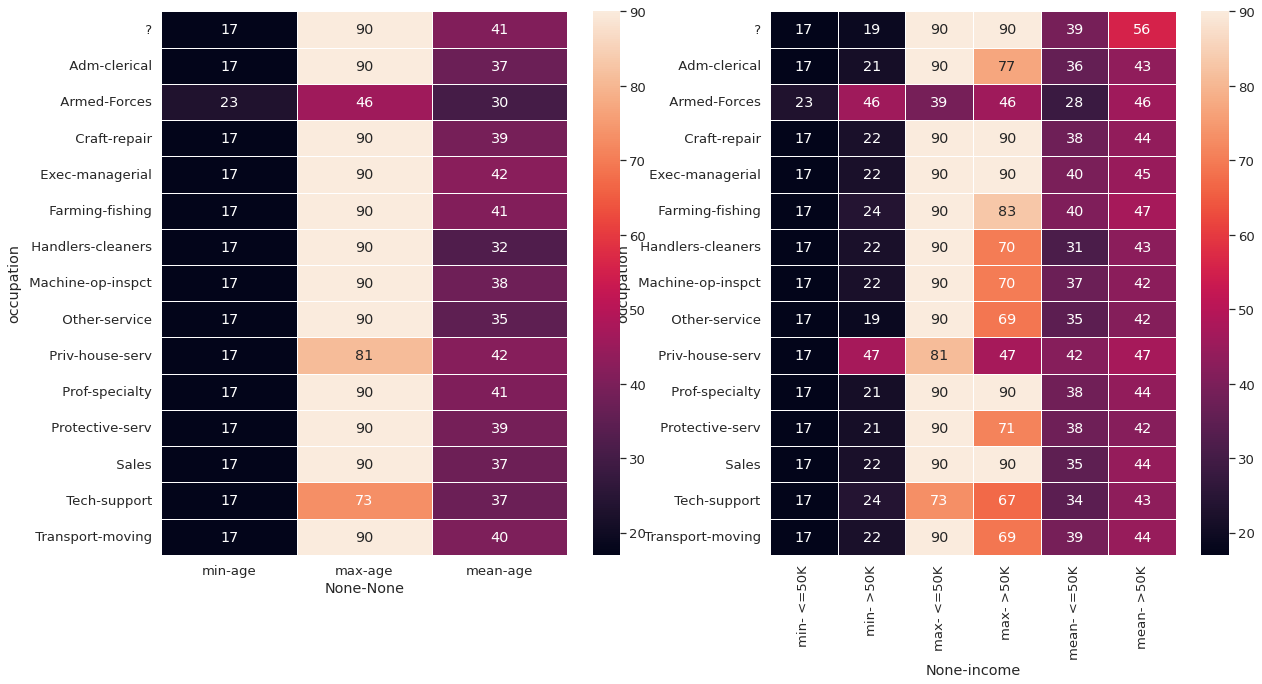

In [102]:
pivot_tab = adult_df.pivot_table(values='age', index='occupation', aggfunc=[min, max, np.mean])
pivot_income_tab = adult_df.pivot_table(values='age', index='occupation', columns='income', aggfunc=[min, max, np.mean])
fig, ax = plt.subplots(1, 2, figsize=(20,10)) 
sns.heatmap(pivot_income_tab, annot=True, linewidths=.5, ax=ax[1], linecolor='white')
sns.heatmap(pivot_tab, annot=True, linewidths=.5, ax=ax[0], linecolor='white');

- Armed Forces have the highest min age 23 and the lowest max age 46
- Min ages of income >50K are greater than income <=50K
- Max ages of income >50K in "Protective-serv", "Transport-moving", "Handlers-cleaners", "Machine-op-inspct" and "Other-service" is lower than other higher occupations such as "Exec-managerial", "Prof-speciality" and "Sales" 

> ### Occupation & Hours Per Week & Work Type

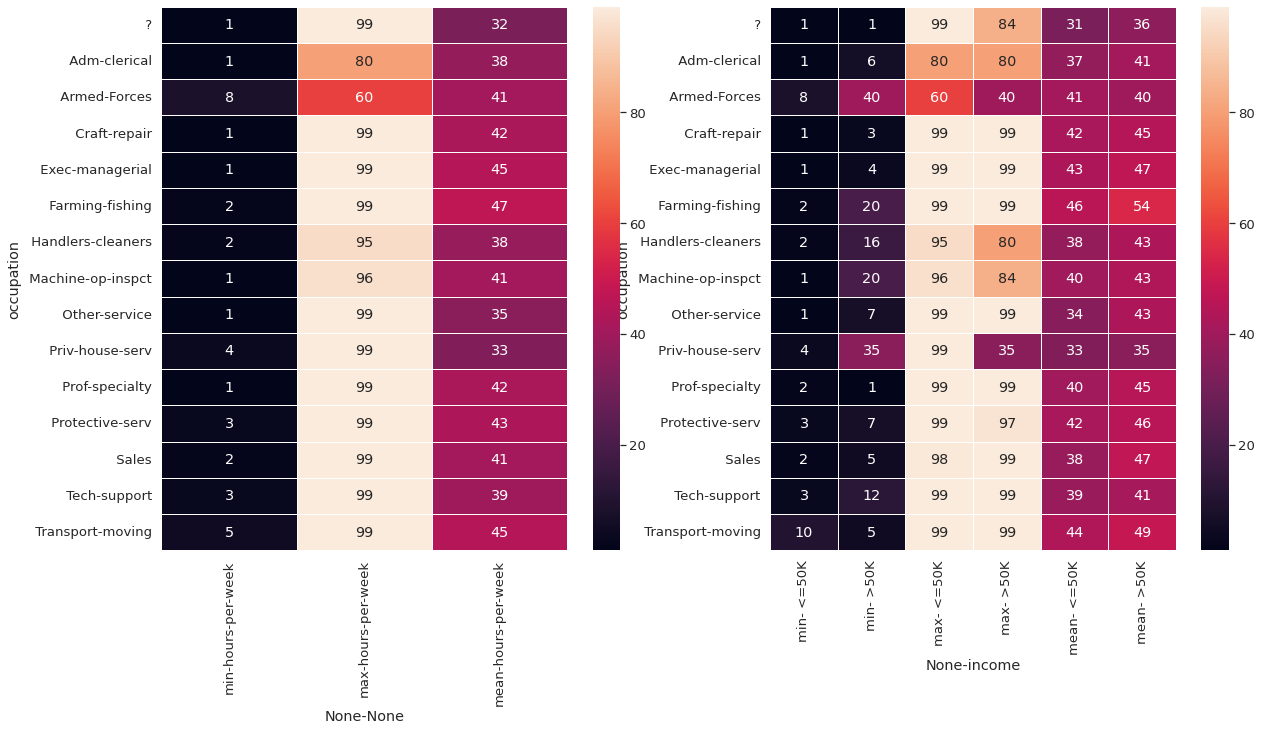

In [103]:
pivot_tab = adult_df.pivot_table(values='hours-per-week', index='occupation', aggfunc=[min, max, np.mean])
pivot_income_tab = adult_df.pivot_table(values='hours-per-week', index='occupation', columns='income', aggfunc=[min, max, np.mean])
fig, ax = plt.subplots(1, 2, figsize=(20,10)) 
sns.heatmap(pivot_income_tab, annot=True, linewidths=.5, ax=ax[1], linecolor='white')
sns.heatmap(pivot_tab, annot=True, linewidths=.5, ax=ax[0], linecolor='white');

- Armed Forces have the lowest max hours per week 60 
- Highest average working hours are 47 for "Farming-fishing", then 45 for "Exec-managerial" & "Transport-moving"
- Lowest averages for "?" and "Priv-house-serv"

In [104]:
df = pd.crosstab(adult_df['work-type'],adult_df['occupation'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
work-type,,,,,,,,,,,,,,,
Full-time,846,2585,5,2642,1844,369,855,1464,1736,55,2061,399,1482,598,789
Over-time,207,530,3,1226,1980,484,233,407,409,23,1602,194,1420,200,663
Part-time,790,655,1,231,242,141,282,131,1150,71,477,56,748,130,145


- The highest percentage of Full-time related to "Craft-repair" occupation
- The highest percentage of Over-time related to "Exec-managerial" occupation, most of "Farming-fishing" working Over-time
- The highest percentage of Part-time related to "Other-service" occupation, most of 'Priv-house-serv' also working Part-time

> ### Workclass & Age

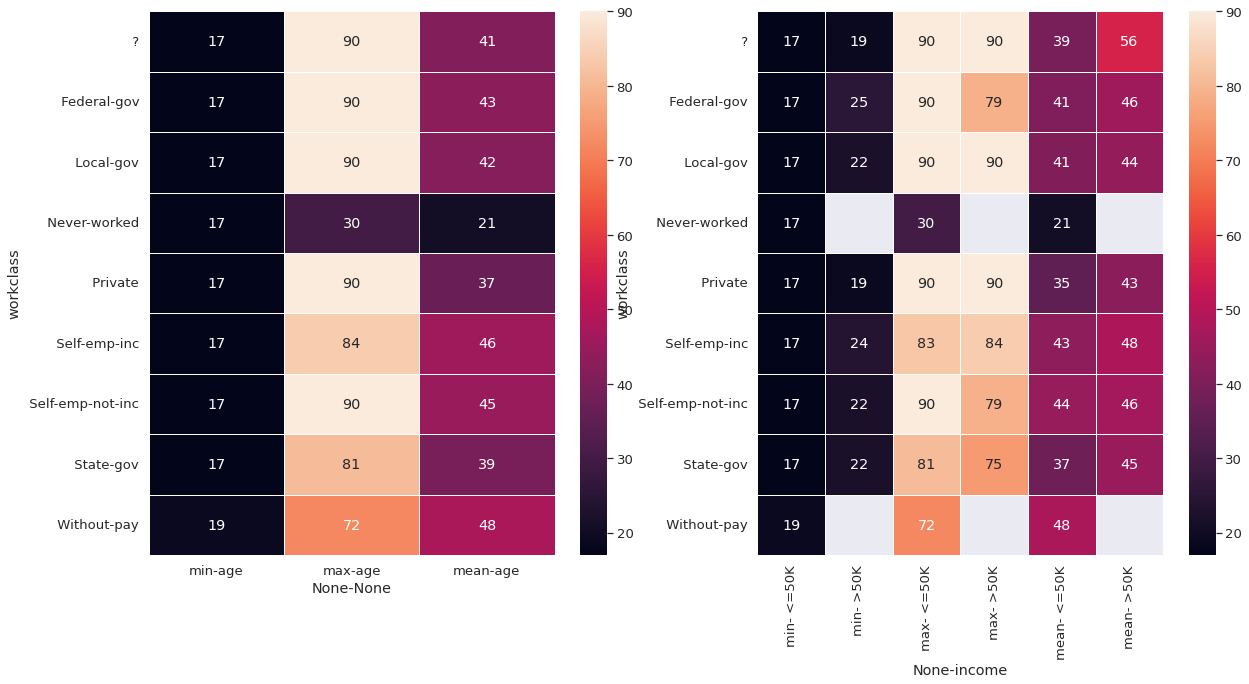

In [105]:
pivot_tab = adult_df.pivot_table(values='age', index='workclass', aggfunc=[min, max, np.mean])
pivot_income_tab = adult_df.pivot_table(values='age', index='workclass', columns='income', aggfunc=[min, max, np.mean])
fig, ax = plt.subplots(1, 2, figsize=(20,10)) 
sns.heatmap(pivot_income_tab, annot=True, linewidths=.5, ax=ax[1], linecolor='white')
sns.heatmap(pivot_tab, annot=True, linewidths=.5, ax=ax[0], linecolor='white');

- Never-worked max age 30, without-pay has the lowest max age 72 after never-worked
- State-gov with income >50K has the lowest max age 

> ### Marital-Status & Gender

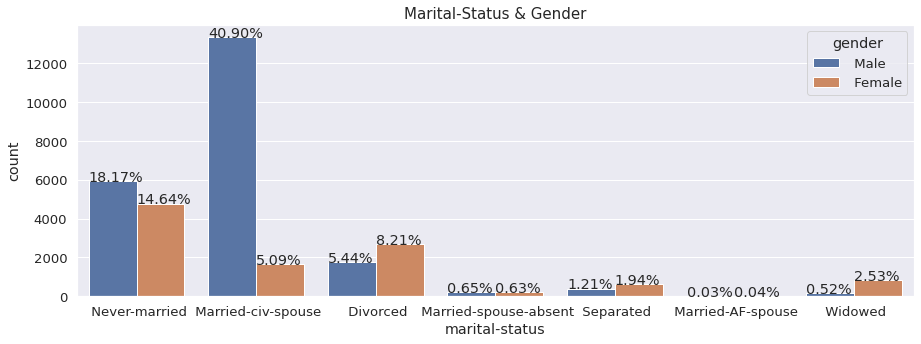

In [106]:
sns.set(rc={'figure.figsize': [15, 5]}, font_scale=1.2)
plt.title('Marital-Status & Gender', fontsize=15)
ax=sns.countplot(x='marital-status', data=adult_df, hue='gender');
display_countplot_percent(adult_df, ax, True)

- Females have the majority in "Divorced", "Separated" and "Widowed" marital status and those marital status have the lowest ">50K" income
- On the other hand "Married-civ-spouse" the majority are males and this marital status has the highest ">50K" income ratio

> ### Marital-Status & Gender & Occupation

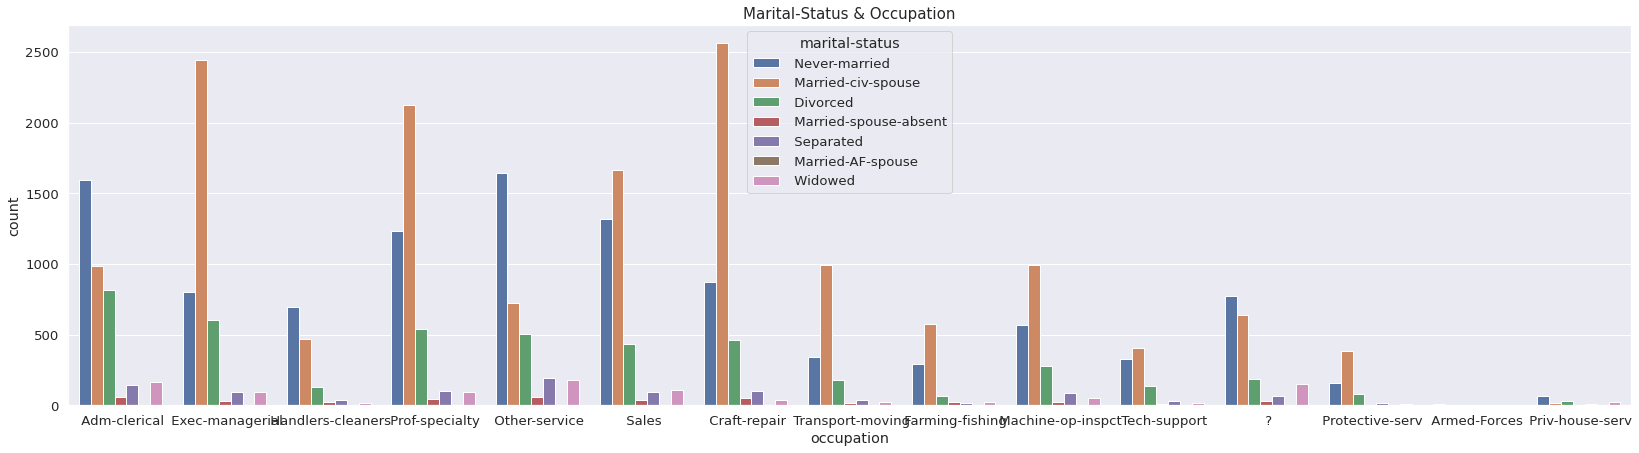

In [107]:
sns.set(rc={'figure.figsize': [28, 7]}, font_scale=1.2)
plt.title('Marital-Status & Occupation', fontsize=15)
sns.countplot(x='occupation', data=adult_df, hue='marital-status');

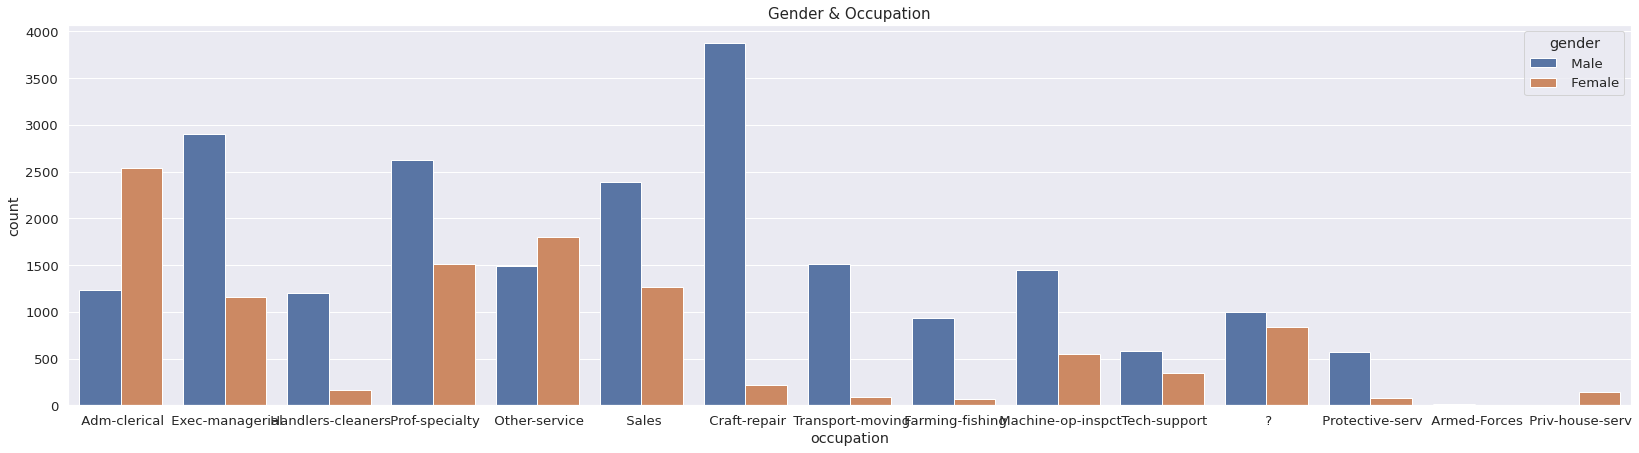

In [108]:
sns.set(rc={'figure.figsize': [28, 7]}, font_scale=1.2)
plt.title('Gender & Occupation', fontsize=15)
sns.countplot(x='occupation', data=adult_df, hue='gender');

- "Never-married" has the highest frequency in "Adm-clerical", "Handlers-cleaners", "Other-service", "Private-house-ser" and "?"
- On the other hand "Married-civ-spause" has the majority in the others
>
- Females have the majority in "Adm-clerical", "Other-service", as mentioned above that females have the majority in "Divorced", "Separated" and "Widowed" marital status, we can see also that the highest percentage of divorced working as "Adm-clerical" and for separted and widowed in "Other-service"
- On the other hand, majority of males are married-civ-spouse which also have the highest percentage in "Craft-repair" occupations

> ### Marital-Status & Relationship

In [109]:
df=pd.crosstab(adult_df['relationship'],adult_df['marital-status'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
relationship,,,,,,,
Husband,0,9,13184,0,0,0,0
Not-in-family,2404,0,17,211,4706,420,547
Other-relative,110,1,124,32,611,55,48
Own-child,328,1,95,45,4485,99,15
Unmarried,1601,0,0,130,881,451,383
Wife,0,12,1556,0,0,0,0


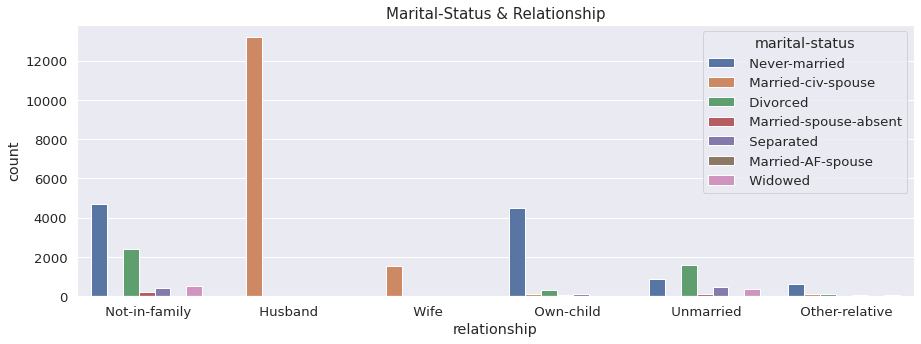

In [110]:
sns.set(rc={'figure.figsize': [15, 5]}, font_scale=1.2)
plt.title('Marital-Status & Relationship', fontsize=15)
sns.countplot(x='relationship', data=adult_df, hue='marital-status');

- Divorced, Separated, Widowed and Married-spouse-absent most of them are Not-in-family or Unmarried
- Never-married most of them are are Not-in-family or Own-child
- Married-AF-spouse and Married-civ-spouse most of them are Husband and Wife
>
- Wife or husband both are partners and the different in genders column 
- Not-in-family and Unmarried can be merged in Not-in-family as we already have Never-married in marital status

> ### Gender & Marital-Status & Relationship

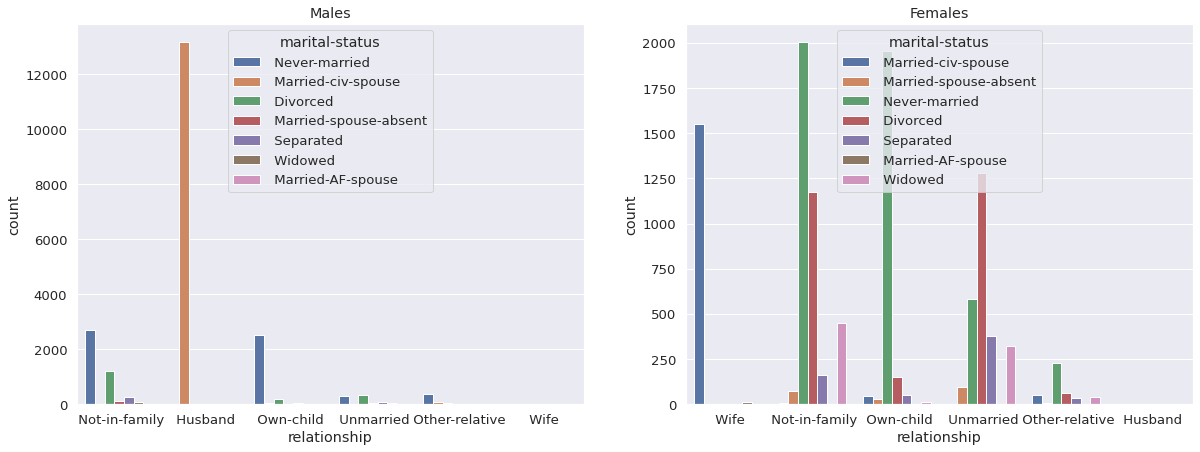

In [111]:
male_df = adult_df[adult_df['gender'] == ' Male']
female_df = adult_df[adult_df['gender'] == ' Female']

fig, ax = plt.subplots(1, 2, figsize=(20,7)) 
sns.countplot(x='relationship', data=male_df, hue='marital-status', ax=ax[0]).set(title='Males')
sns.countplot(x='relationship', data=female_df, hue='marital-status', ax=ax[1]).set(title='Females');

- The majority of "Own-child" are "Never-married" and  males are higher than females in "Never-married" marital status but no big diffrenece between them
- The majority of "Ummarried" are females and "Divorced" and females are higher than males in "Divorced" marital status
- Most of unmarried are females and divorced
- Most of Not-in-family are females and Never-married or divorced
- Males are more than females in Own-child relationship

> ### Race & Occupation

In [112]:
df=pd.crosstab(adult_df['race'],adult_df['occupation'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
race,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,25,31,1,44,30,10,22,19,33,0,33,8,26,4,25
Asian-Pac-Islander,65,139,0,89,135,16,23,59,128,4,186,15,108,44,28
Black,215,490,1,244,244,42,179,274,571,28,239,102,254,71,170
Other,23,26,0,28,11,11,12,39,40,3,31,5,25,3,14
White,1515,3084,7,3694,3646,915,1134,1611,2523,114,3651,519,3237,806,1360


- As mentioned before that Asian-Pac-Islander has the highest ">50K" income ratio, most of them working as "Prof-specialty" 
- White race has the second highest ">50K" income ratio, most of them working as "Craft-repair", "Prof-specialty" and "Exec-managerial"
- On the other hand for Other race, most of them working as "Other-service" and "Machine-op-inspct"
- Black race also most of them working as "Other-service" and "Adm-clerical"

> ### Race & Gender

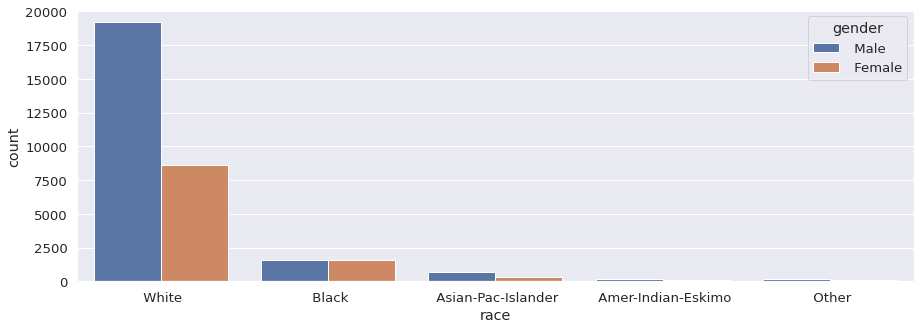

In [113]:
sns.countplot(x='race', data=adult_df, hue='gender');

- In all races males are more than females except black race are almost equal

> ### Race & Hours Per Week & Age

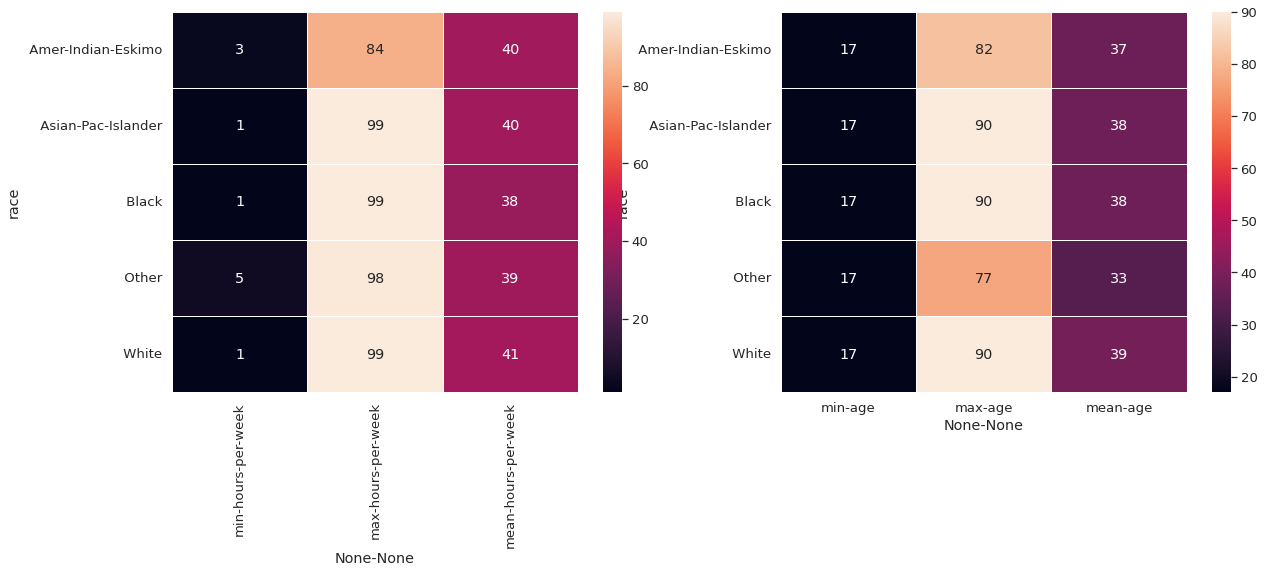

In [114]:
pivot_hrs_tab = adult_df.pivot_table(values='hours-per-week', index='race', aggfunc=[min, max, np.mean])
pivot_age_tab = adult_df.pivot_table(values='age', index='race', aggfunc=[min, max, np.mean])
fig, ax = plt.subplots(1, 2, figsize=(20,7)) 
sns.heatmap(pivot_hrs_tab, annot=True, linewidths=.5, linecolor='white',  ax=ax[0]);
sns.heatmap(pivot_age_tab, annot=True, linewidths=.5, linecolor='white',  ax=ax[1]);

- Amer-Indian-Eskimo race has the lowest max hours per week and age
- Average working hours in week is close, no big difference, black has the lowest average
- Average in ages is close, no big difference, Other race has the lowest average

> ### Race & Work Type

In [115]:
df=pd.crosstab(adult_df['work-type'],adult_df['race'])
df.style.highlight_max(color = 'lightgreen', axis = 0).highlight_max(color = 'purple', axis = 1)#0 col, 1 row

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
work-type,,,,,
Full-time,193,639,2143,175,14580
Over-time,71,236,461,53,8760
Part-time,47,164,520,43,4476


> ##### Compare the relations between all numerical features

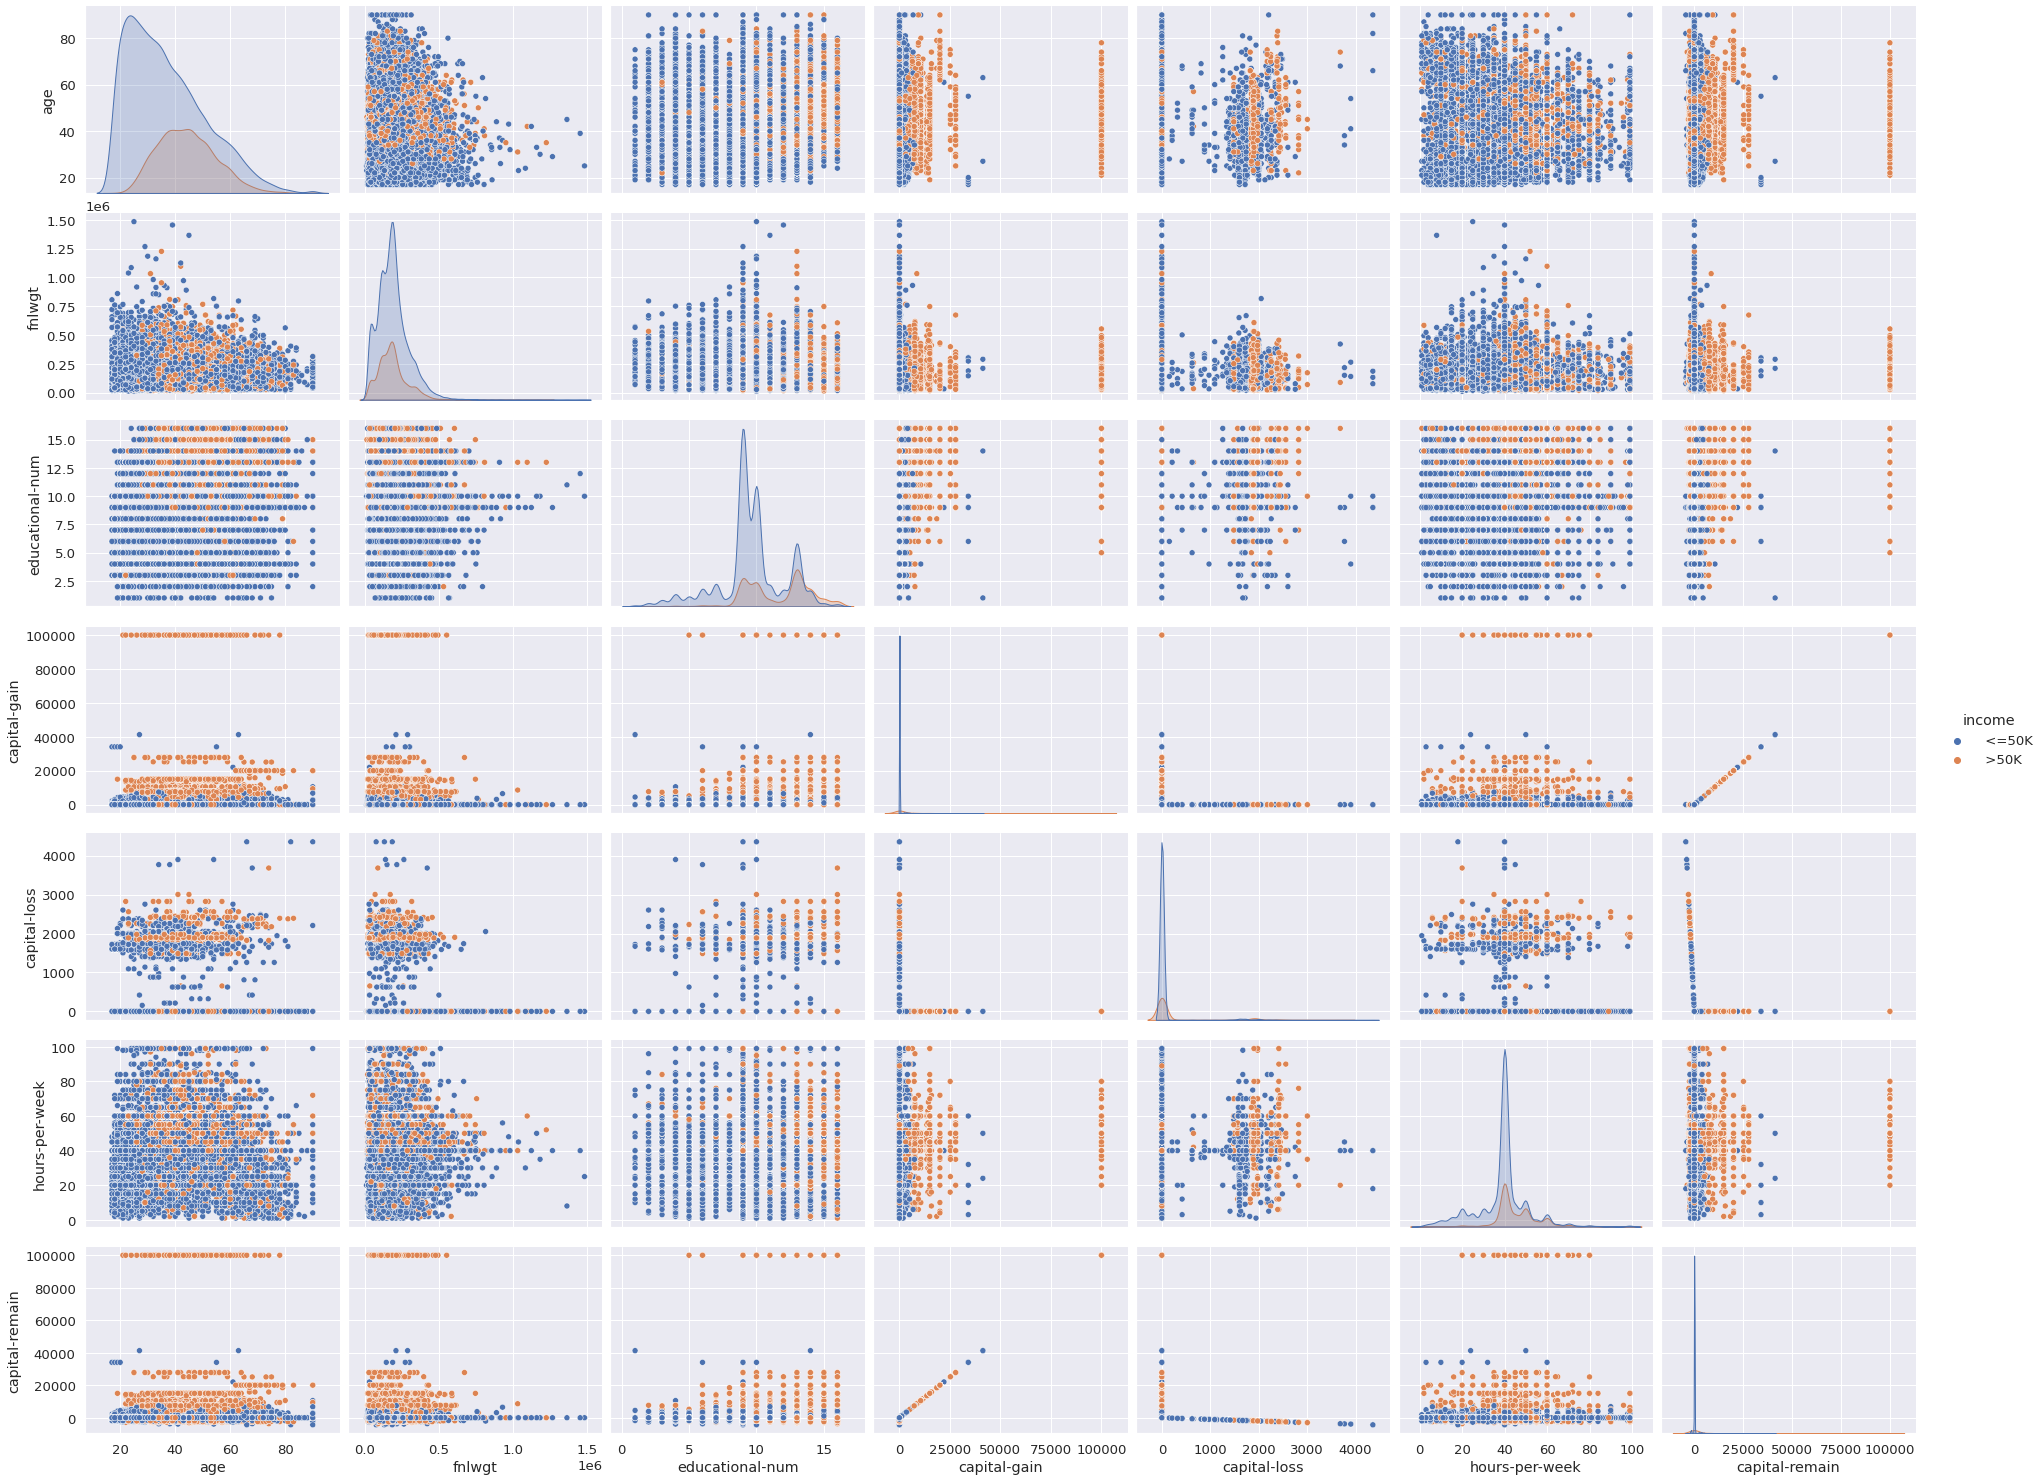

In [116]:
sns.pairplot(adult_df, hue='income', height=3, aspect=1.3);

- No clear relationship 

### Draft

##### - Discuss merging both "Armed-Force" and "Protective-serv" in one category

In [117]:
adult_df[((adult_df['occupation'] == ' Protective-serv') | (adult_df['occupation'] == ' Armed-Forces'))& (adult_df['workclass'] == ' Federal-gov') & (adult_df['education'] == ' Masters')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain,age-range,age-box-range
2783,43,Federal-gov,186916,Masters,14,Divorced,Protective-serv,Not-in-family,White,Male,0,0,60,United-States,>50K,Over-time,0,"(40, 50]","(37, 48]"
14839,43,Federal-gov,287008,Masters,14,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,35,United-States,>50K,Full-time,0,"(40, 50]","(37, 48]"
25799,46,Federal-gov,344415,Masters,14,Married-civ-spouse,Armed-Forces,Husband,White,Male,0,1887,40,United-States,>50K,Full-time,-1887,"(40, 50]","(37, 48]"


In [118]:
adult_df[((adult_df['occupation'] == ' Protective-serv') | (adult_df['occupation'] == ' Armed-Forces'))& (adult_df['workclass'] == ' Federal-gov') & (adult_df['education'] == ' Bachelors')]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,work-type,capital-remain,age-range,age-box-range
4763,31,Federal-gov,206823,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,50,United-States,>50K,Over-time,0,"(30, 40]","(28, 37]"
5238,39,Federal-gov,99146,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1887,60,United-States,>50K,Over-time,-1887,"(30, 40]","(37, 48]"
8768,52,Federal-gov,221532,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K,Over-time,0,"(50, 60]","(48, 90]"
9344,34,Federal-gov,198265,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,60,United-States,<=50K,Over-time,0,"(30, 40]","(28, 37]"
10355,47,Federal-gov,227244,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,50,United-States,>50K,Over-time,0,"(40, 50]","(37, 48]"
12385,34,Federal-gov,419691,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,7298,0,54,United-States,>50K,Over-time,7298,"(30, 40]","(28, 37]"
14351,30,Federal-gov,295010,Bachelors,13,Never-married,Protective-serv,Not-in-family,White,Female,0,0,60,United-States,>50K,Over-time,0,"(20, 30]","(28, 37]"
14757,52,Federal-gov,22428,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,60,United-States,>50K,Over-time,0,"(50, 60]","(48, 90]"
16111,24,Federal-gov,287988,Bachelors,13,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K,Full-time,0,"(20, 30]","(17, 28]"
17512,27,Federal-gov,46442,Bachelors,13,Never-married,Protective-serv,Not-in-family,White,Female,0,0,35,United-States,<=50K,Full-time,0,"(20, 30]","(17, 28]"


- Working in Fedral-gov workclass specialy in "Protective-serv" or "Armed-Forces" with "Masters" gain ">50K", also most of "Bachelors" except whom in twenties

##### - Discuss merging both "Handlers-cleaners" with "Other-service"

In [119]:
both_df = adult_df[((adult_df['occupation'] == ' Handlers-cleaners') | (adult_df['occupation'] == ' Other-service'))]
both_df['education'].value_counts()

 HS-grad         1892
 Some-college    1048
 11th             361
 10th             265
 Bachelors        231
 9th              150
 7th-8th          144
 Assoc-voc        143
 12th             123
 5th-6th          104
 Assoc-acdm       102
 1st-4th           56
 Masters           24
 Preschool         17
 Prof-school        4
 Doctorate          1
Name: education, dtype: int64

In [120]:
both_df[both_df['income'] == ' >50K']['education'].value_counts()

 HS-grad         91
 Some-college    45
 Bachelors       40
 Assoc-voc       11
 11th            11
 Assoc-acdm       8
 9th              5
 12th             3
 10th             3
 5th-6th          2
 7th-8th          1
 Doctorate        1
 Prof-school      1
 Masters          1
Name: education, dtype: int64

- In both occupations even the higher education level such as "Doctorate", "Prof-school" and "Masters" the majority gain "<=50K" income